In [1]:
!git --version

git version 2.34.1


In [2]:
!git clone https://github.com/dinhtanloc/ads_fraud_detection.git

Cloning into 'ads_fraud_detection'...
remote: Enumerating objects: 6240, done.
remote: Counting objects: 100% (611/611), done.
remote: Compressing objects: 100% (344/344), done.
remote: Total 6240 (delta 422), reused 359 (delta 259), pack-reused 5629 (from 3)
Receiving objects: 100% (6240/6240), 380.68 MiB | 39.17 MiB/s, done.
Resolving deltas: 100% (3574/3574), done.
Updating files: 100% (1871/1871), done.


In [3]:
pip install joblib cufflinks pydantic-settings mlxtend keras-tuner wandb shap lime tabnet-keras imbalanced-learn scikit-learn-extra xgboost lightgbm faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 103.7 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [4]:
from kaggle_secrets import UserSecretsClient
import os
user_secrets = UserSecretsClient()
KAGGLE_KEY = user_secrets.get_secret("KAGGLE_KEY")
KAGGLE_USERNAME = user_secrets.get_secret("KAGGLE_USERNAME")
os.environ['KAGGLE_USERNAME'] = KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = KAGGLE_KEY

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

print("Kaggle API authenticated successfully!")

Kaggle API authenticated successfully!


/kaggle/working/ads_fraud_detection
/kaggle/working/ads_fraud_detection
2.17.1
Data download location /kaggle/working/tmp
vehicleloan
Train set: 


EVENT_ID disbursed_amount asset_cost    ltv branch_id supplier_id manufacturer_id current_pincode_id date_of_birth employment_type state_id employee_code_id mobileno_avl_flag aadhar_flag pan_flag voterid_flag driving_flag passport_flag perform_cns_score perform_cns_score_description pri_no_of_accts pri_active_accts pri_overdue_accts pri_current_balance pri_sanctioned_amount pri_disbursed_amount sec_no_of_accts sec_active_accts sec_overdue_accts sec_current_balance sec_sanctioned_amount sec_disbursed_amount primary_instal_amt sec_instal_amt new_accts_in_last_six_months delinquent_accts_in_last_six_months average_acct_age credit_history_length no_of_inquiries  EVENT_LABEL                             ENTITY_ID       EVENT_TIMESTAMP       LABEL_TIMESTAMP ENTITY_TYPE
8976     462711            33484      62644  55.23        67       22727              45               1511    16-06-1991        Salaried        6             1201                 1           1        0            0            0             0               743               C-Very Low Risk               9                5                 0              160423                230489               194538               0                0                 0                   0                     0                    0               9149              0                            4                                   0        0yrs 7mon             1yrs 4mon               1            0  d8d1f927-ff57-4196-804a-f4a1905f70c0  2024-12-30T00:04:14Z  2025-04-29T04:25:31Z        user
76007    558674            66882      81187  84.37         2       23508              86               1708    15-09-1994        Salaried        4             1060                 1           1        0            0            0             0                 0   No Bureau History Available               0                0                 0                   0                     0                    0               0                0                 0                   0                     0                    0                  0              0                            0                                   0        0yrs 0mon             0yrs 0mon               0            0  3da63220-1cc3-4fc2-98d5-daf247698342  2024-10-22T10:23:17Z  2025-04-29T04:25:31Z        user
77677    528251            59113      71757  84.87        48       21478              86               6322    01-01-1995   Self employed        5             1189                 1           1        0            0            0             0               738               C-Very Low Risk               3                3                 0               45828                 58582                58582               0                0                 0                   0                     0                    0               4240              0                            3                                   0        0yrs 2mon             0yrs 4mon               0            1  4322eb46-66fc-4f86-979d-83d9ee3e0ba9  2024-07-17T18:08:26Z  2025-04-29T04:25:31Z        user
209438   633950            56059      71307  81.34       146       18317              86               2989    01-01-1971        Salaried       14             2964                 1           1        0            0            0             0                 0   No Bureau History Available               0                0                 0                   0                     0                    0               0                0                 0                   0                     0                    0                  0              0                            0                                   0        0yrs 0mon             0yrs 0mon               0            1  52a411e9-3785-4bbb-a10a-3dcad0b340d9  2024-06-27T00:09:40Z  2025-04-29T04:25:31Z        user
143261   476747            56759      67100  85.69       136       17783              86               3793

44
(186523, 44)
Test set: 


EVENT_ID disbursed_amount asset_cost    ltv branch_id supplier_id manufacturer_id current_pincode_id date_of_birth employment_type state_id employee_code_id mobileno_avl_flag aadhar_flag pan_flag voterid_flag driving_flag passport_flag perform_cns_score                      perform_cns_score_description pri_no_of_accts pri_active_accts pri_overdue_accts pri_current_balance pri_sanctioned_amount pri_disbursed_amount sec_no_of_accts sec_active_accts sec_overdue_accts sec_current_balance sec_sanctioned_amount sec_disbursed_amount primary_instal_amt sec_instal_amt new_accts_in_last_six_months delinquent_accts_in_last_six_months average_acct_age credit_history_length no_of_inquiries                             ENTITY_ID       EVENT_TIMESTAMP ENTITY_TYPE
0   420825            50578      58400  89.55        67       22807              45               1441    01-01-1984        Salaried        6             1998                 1           1        0            0            0             0                 0                        No Bureau History Available               0                0                 0                   0                     0                    0               0                0                 0                   0                     0                    0                  0              0                            0                                   0        0yrs 0mon             0yrs 0mon               0  b6428749-5a8f-4033-b615-57c7f9e110c9  2024-10-29T21:48:25Z        user
1   518279            54513      61900  89.66        67       22807              45               1501    08-09-1990   Self employed        6             1998                 1           1        0            0            0             0               825                                    A-Very Low Risk               2                0                 0                   0                     0                    0               0                0                 0                   0                     0                    0               1347              0                            0                                   0        1yrs 9mon             2yrs 0mon               0  d65c2575-73fd-46a7-ae1d-30f2f2ceb9de  2024-11-02T19:57:25Z        user
2   510278            43894      61900  71.89        67       22807              45               1501    04-10-1989        Salaried        6             1998                 1           1        0            0            0             0                17  Not Scored: Not Enough Info available on the c...               1                1                 0               72879                 74500                74500               0                0                 0                   0                     0                    0                  0              0                            0                                   0        0yrs 2mon             0yrs 2mon               0  485e1555-02bb-4dcb-9096-f28edf5d92a3  2025-04-26T22:44:07Z        user
3   510980            52603      61300  86.95        67       22807              45               1492    01-06-1968        Salaried        6             1998                 1           0        0            1            0             0               818                                    A-Very Low Risk               1                0                 0                   0                     0                    0               0                0                 0                   0                     0                    0               2608              0                            0                                   0        1yrs 7mon             1yrs 7mon               0  6486e09c-c0a9-45b5-92bc-0b878afb41af  2024-10-15T23:14:13Z        user
4   513916            57713      65750  89.28        67       22807              45               1440    01-06-1976   Self employed        6             1998                 1           1        0

(46631, 42)
Test scores


EVENT_LABEL
0            0
1            0
2            0
3            0
4            0

EVENT_LABEL
0    36323
1    10308
Name: count, dtype: int64
EVENT_LABEL
0    0.783925
1    0.216075
Name: proportion, dtype: float64
(186523, 43) (46631, 43)
<class 'pandas.core.frame.DataFrame'>
Index: 186523 entries, 8976 to 139992
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   EVENT_ID                             186523 non-null  object
 1   disbursed_amount                     186523 non-null  object
 2   asset_cost                           186523 non-null  object
 3   ltv                                  186523 non-null  object
 4   branch_id                            186523 non-null  object
 5   supplier_id                          186523 non-null  object
 6   manufacturer_id                      186523 non-null  object
 7   current_pincode_id                   186523 non-null  object
 8   date_of_birth                        186523 non-null  object
 9   em

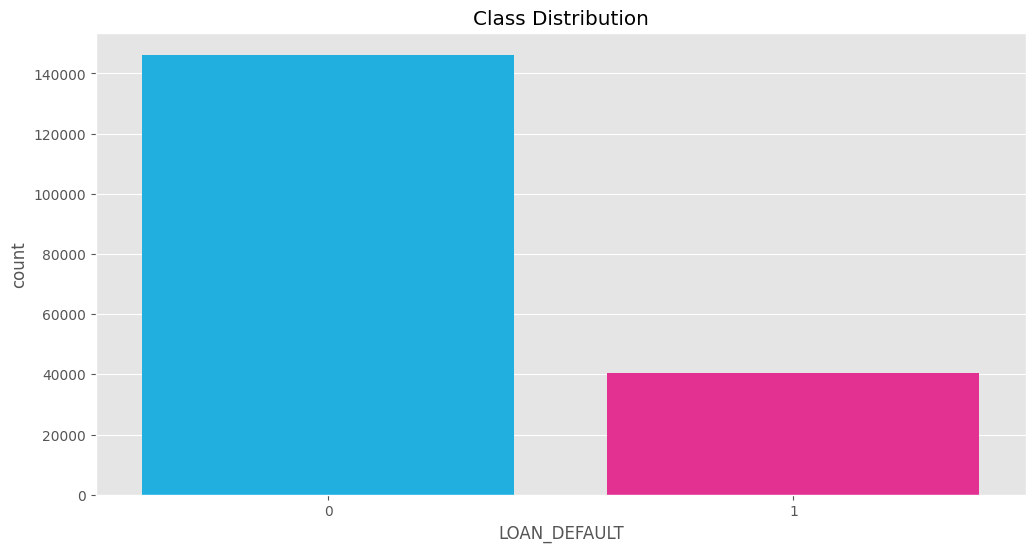

% of no defaults       : 78.39247706717134
Number of no defaults     : 146220
% of defaults         : 21.607522932828658
Number of defaults    : 40303
Employment type

EMPLOYMENT_TYPE  LOAN_DEFAULT
Missing          0               0.783249
                 1               0.216751
Salaried         0               0.796898
                 1               0.203102
Self employed    0               0.774040
                 1               0.225960
Name: proportion, dtype: float64
##############

Mobile Flag

MOBILENO_AVL_FLAG  LOAN_DEFAULT
1                  0               0.783925
                   1               0.216075
Name: proportion, dtype: float64
##############

Aadhar Flag

AADHAR_FLAG  LOAN_DEFAULT
0            0               0.746589
             1               0.253411
1            0               0.791012
             1               0.208988
Name: proportion, dtype: float64
##############

Pan Flag

PAN_FLAG  LOAN_DEFAULT
0         0               0.784099
          1

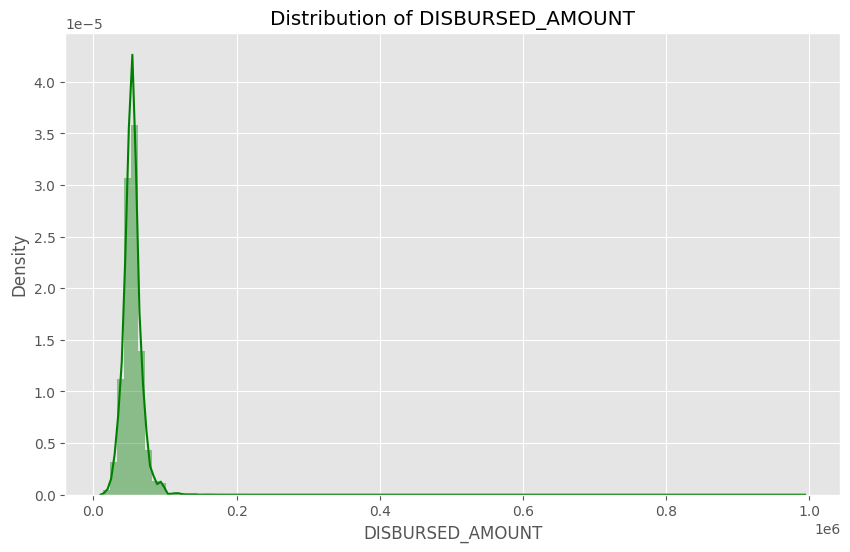

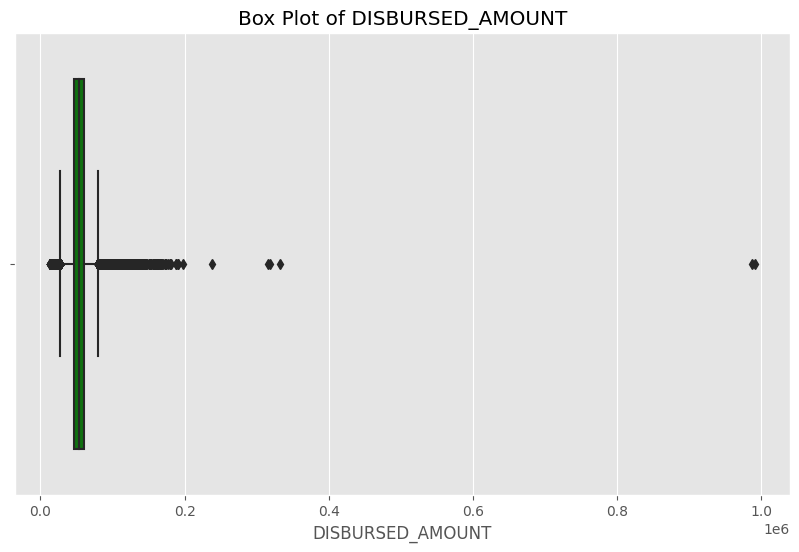

No. of observations in column:  186523
Statistics: Mean=54340.127, Std dev=13021.099
Identified outliers: 2469
No. of observations in column:  186523


<Figure size 1000x5000 with 0 Axes>

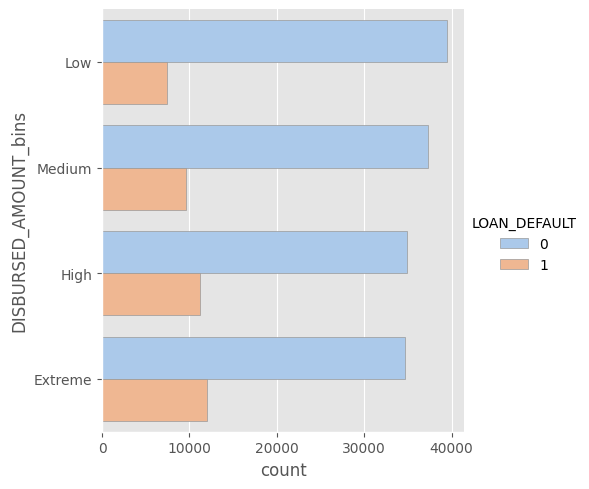

count     186523
unique     42475
top        68000
freq         539
Name: ASSET_COST, dtype: object


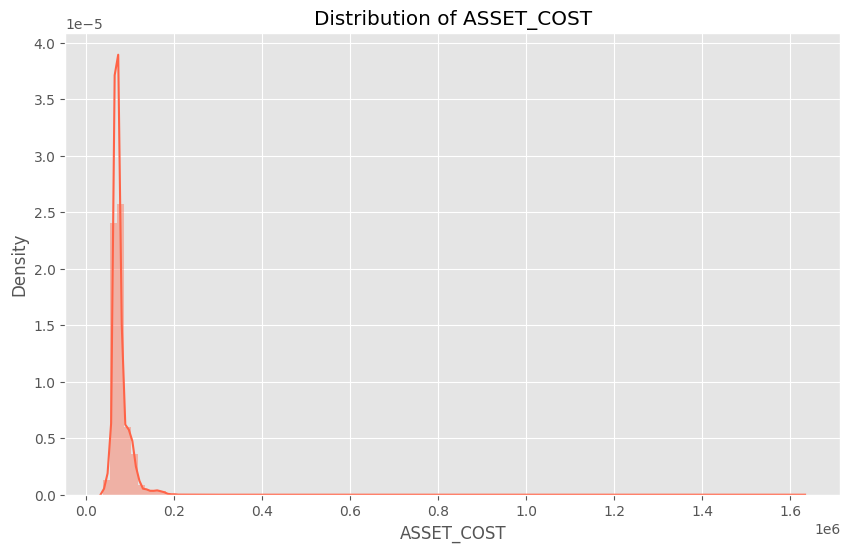

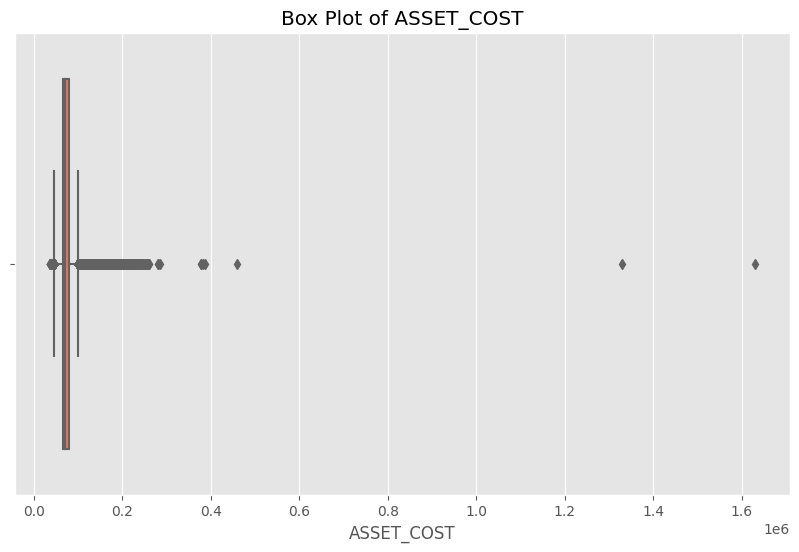

No. of observations in column:  186523
Statistics: Mean=75835.490, Std dev=18998.475
Identified outliers: 3531
No. of observations in column:  186523
No. of observations in column:  186523
Statistics: Mean=68037.630, Std dev=9609.975
Identified outliers: 44


<Figure size 1000x5000 with 0 Axes>

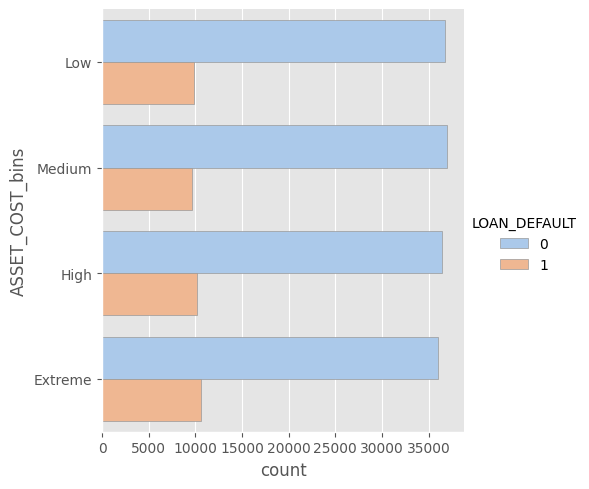

count     186523
unique      6404
top           85
freq        3548
Name: LTV, dtype: object


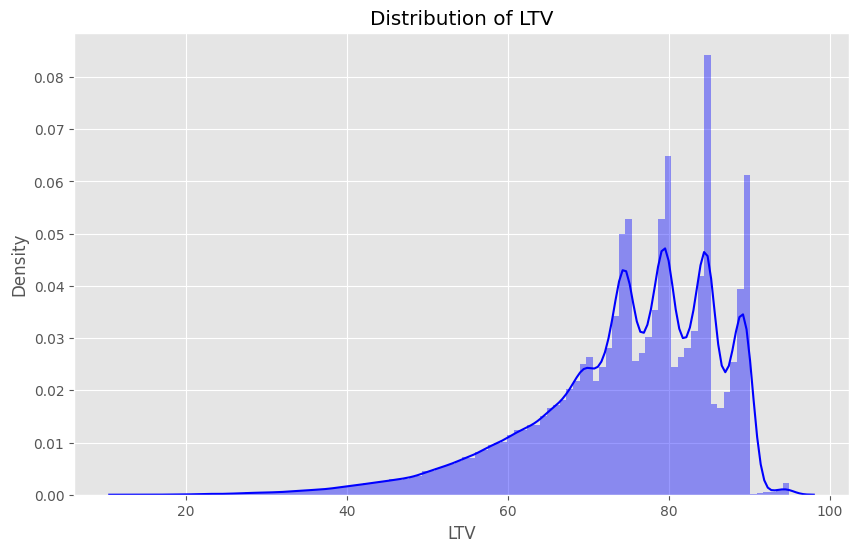

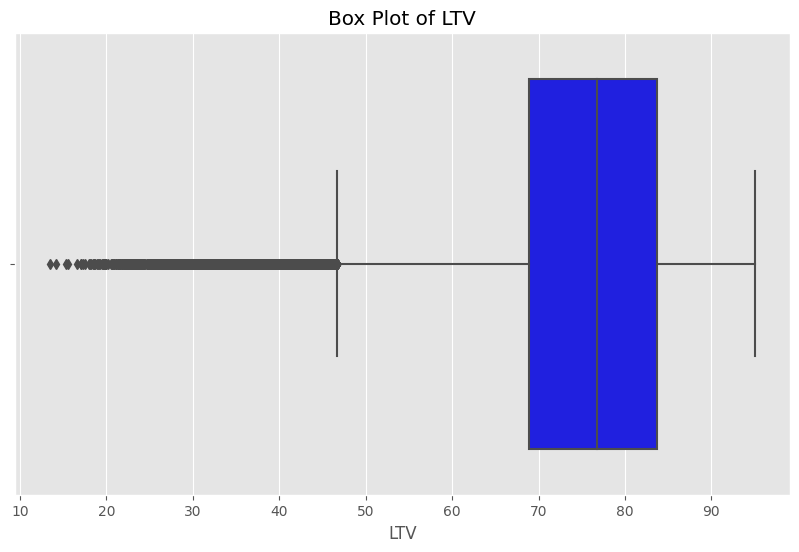

No. of observations in column:  186523
Statistics: Mean=74.745, Std dev=11.446
Identified outliers: 2181
No. of observations in column:  186523
No. of observations in column:  186523
Statistics: Mean=54340.127, Std dev=0.000
Identified outliers: 0
No. of observations in column:  46631
No. of observations in column:  46631
Statistics: Mean=54340.127, Std dev=0.000
Identified outliers: 0


<Figure size 1000x5000 with 0 Axes>

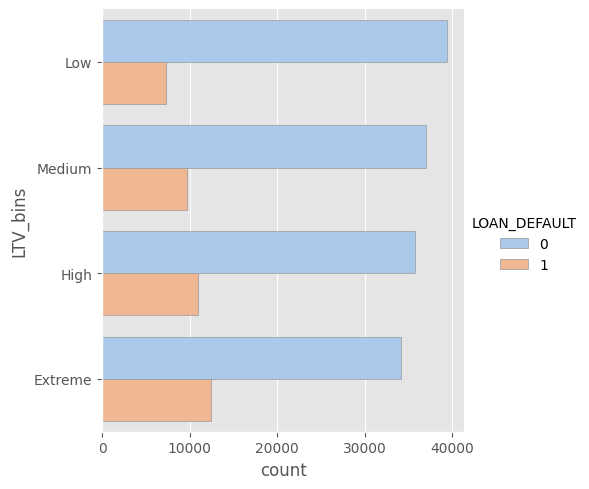

count     186523
unique       572
top            0
freq       93648
Name: PERFORM_CNS_SCORE, dtype: object


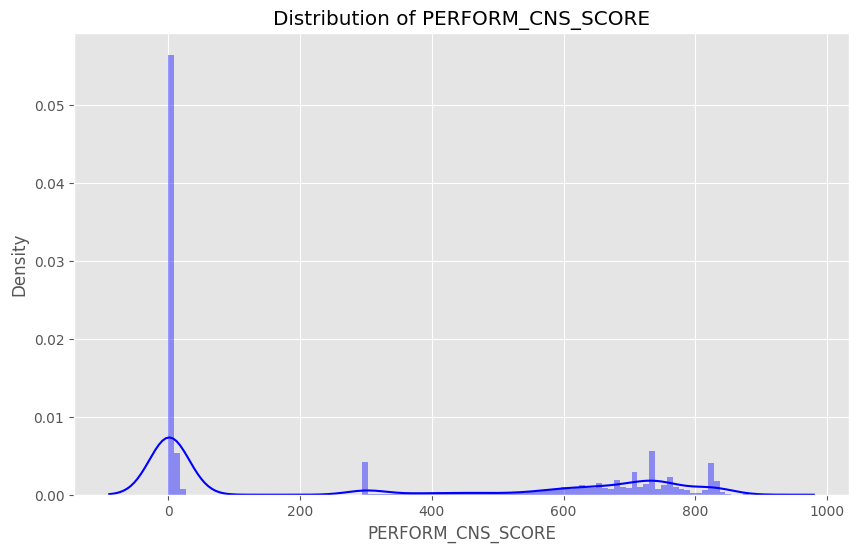

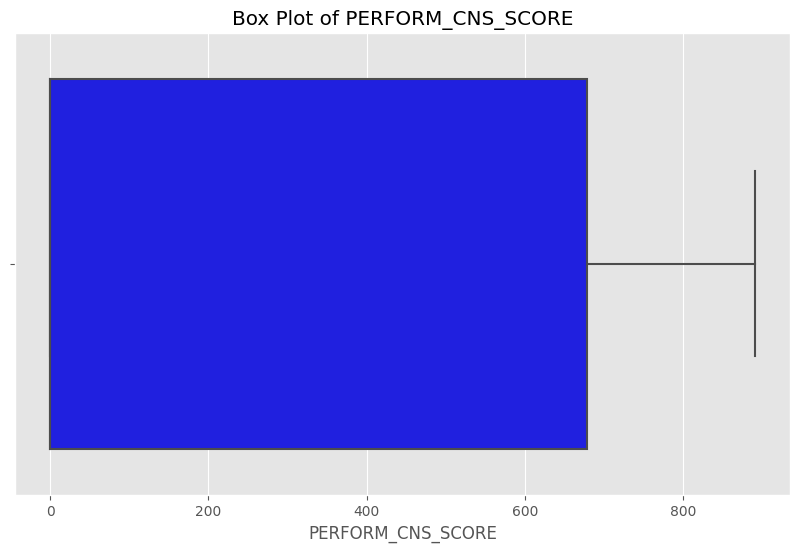

No. of observations in column:  186523
Statistics: Mean=289.388, Std dev=338.442
Identified outliers: 0


<Figure size 1000x5000 with 0 Axes>

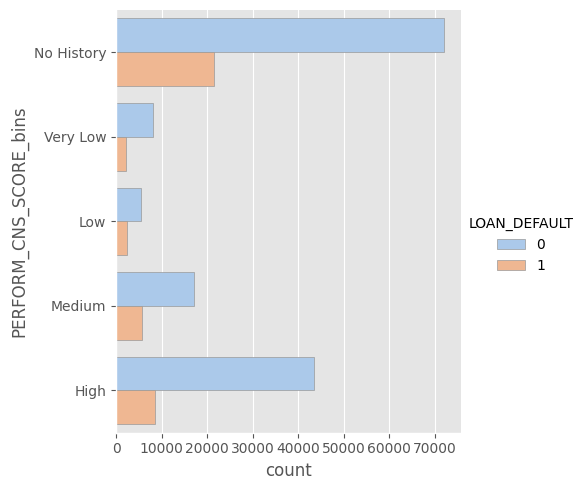

                                                                 counts  percentage
PERFORM_CNS_SCORE_DESCRIPTION                      LOAN_DEFAULT                    
A-Very Low Risk                                    0               9440   83.296568
                                                   1               1893   16.703432
B-Very Low Risk                                    0               6414   87.241567
                                                   1                938   12.758433
C-Very Low Risk                                    0              10644   82.877832
                                                   1               2199   17.122168
D-Very Low Risk                                    0               7708   85.190097
                                                   1               1340   14.809903
E-Low Risk                                         0               3838   82.679879
                                                   1                804   17

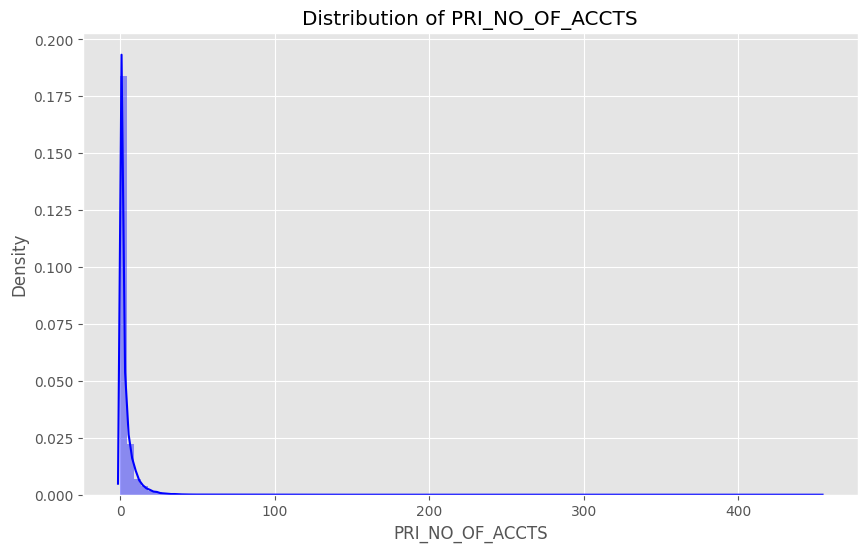

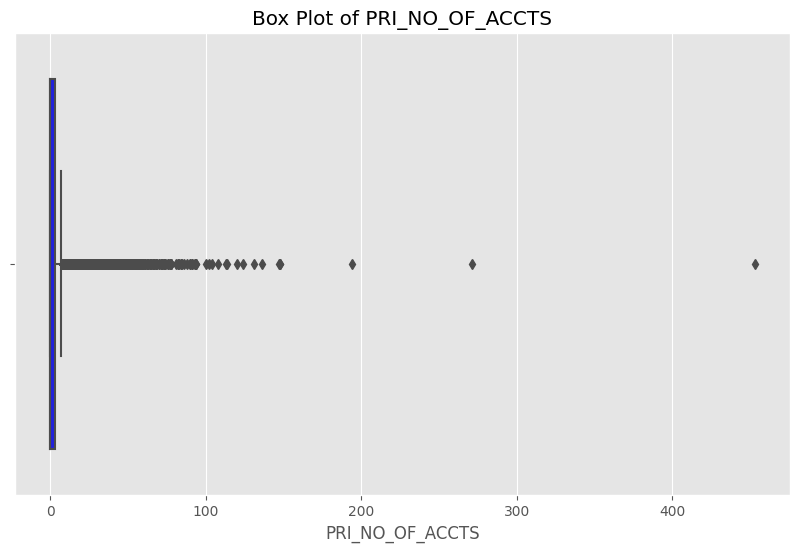

No. of observations in column:  186523
Statistics: Mean=2.436, Std dev=5.200
Identified outliers: 3305
No. of observations in column:  186523
Statistics: Mean=54340.127, Std dev=0.000
Identified outliers: 0


<Figure size 1000x5000 with 0 Axes>

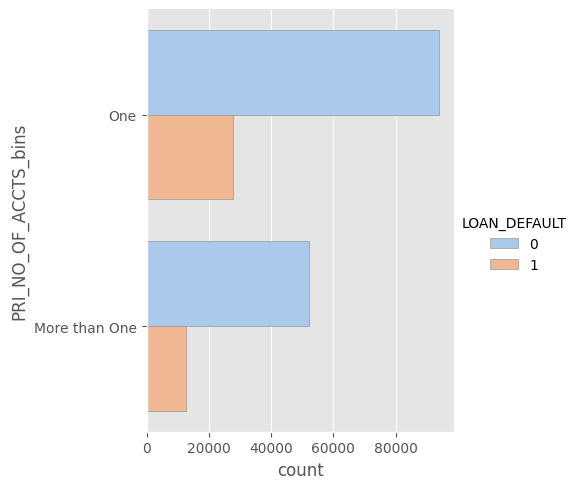

count     186523
unique        21
top            0
freq      165628
Name: PRI_OVERDUE_ACCTS, dtype: object


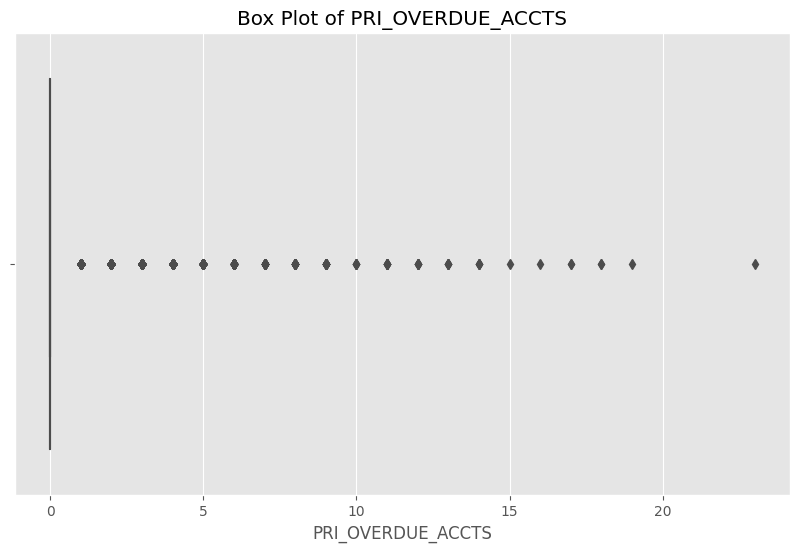

No. of observations in column:  186523
Statistics: Mean=0.155, Std dev=0.546
Identified outliers: 4985
No. of observations in column:  186523
Statistics: Mean=54340.127, Std dev=0.000
Identified outliers: 0


<Figure size 1000x5000 with 0 Axes>

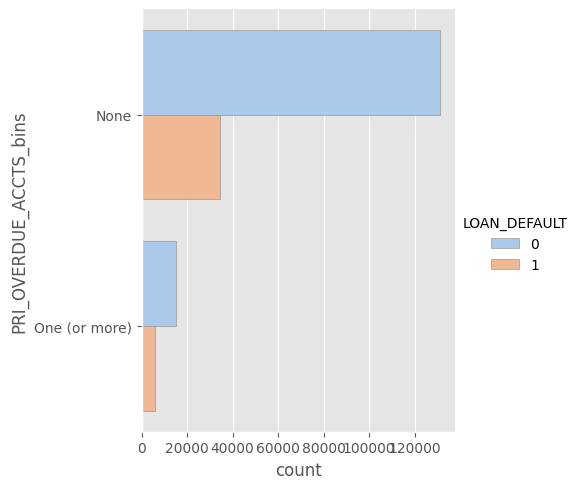

<Figure size 1000x5000 with 0 Axes>

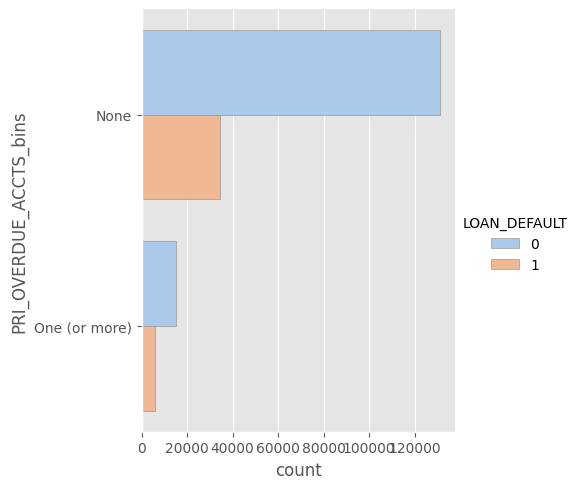

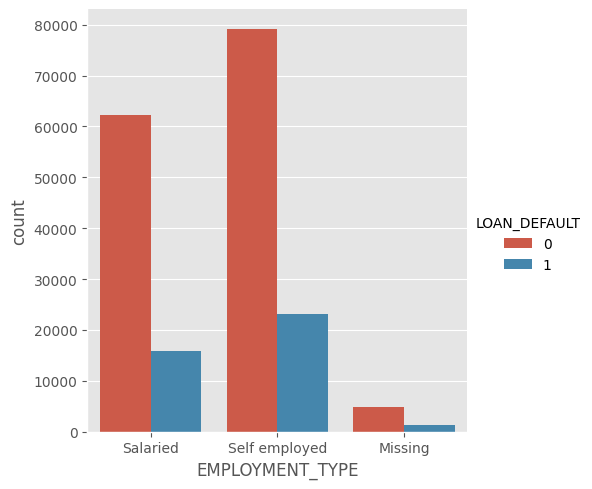

8976      12371
76007     11184
77677     11076
209438    19842
143261    18045
Name: age, dtype: int64
0    15094
1    12652
2    12991
3    20786
4    17864
Name: age, dtype: int64


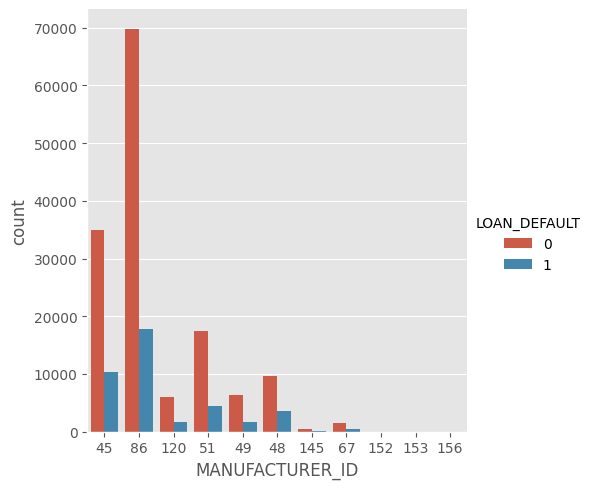

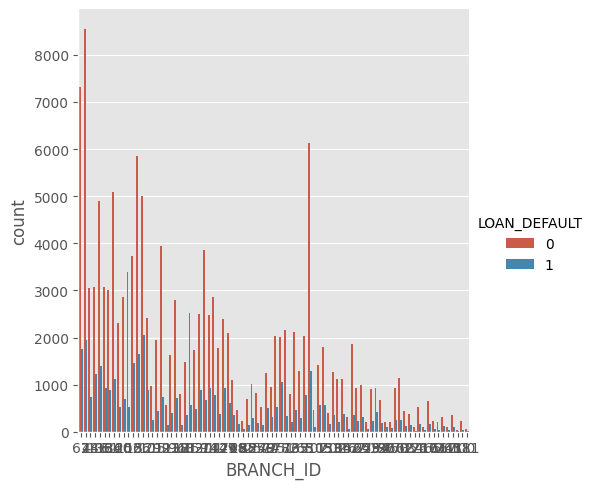

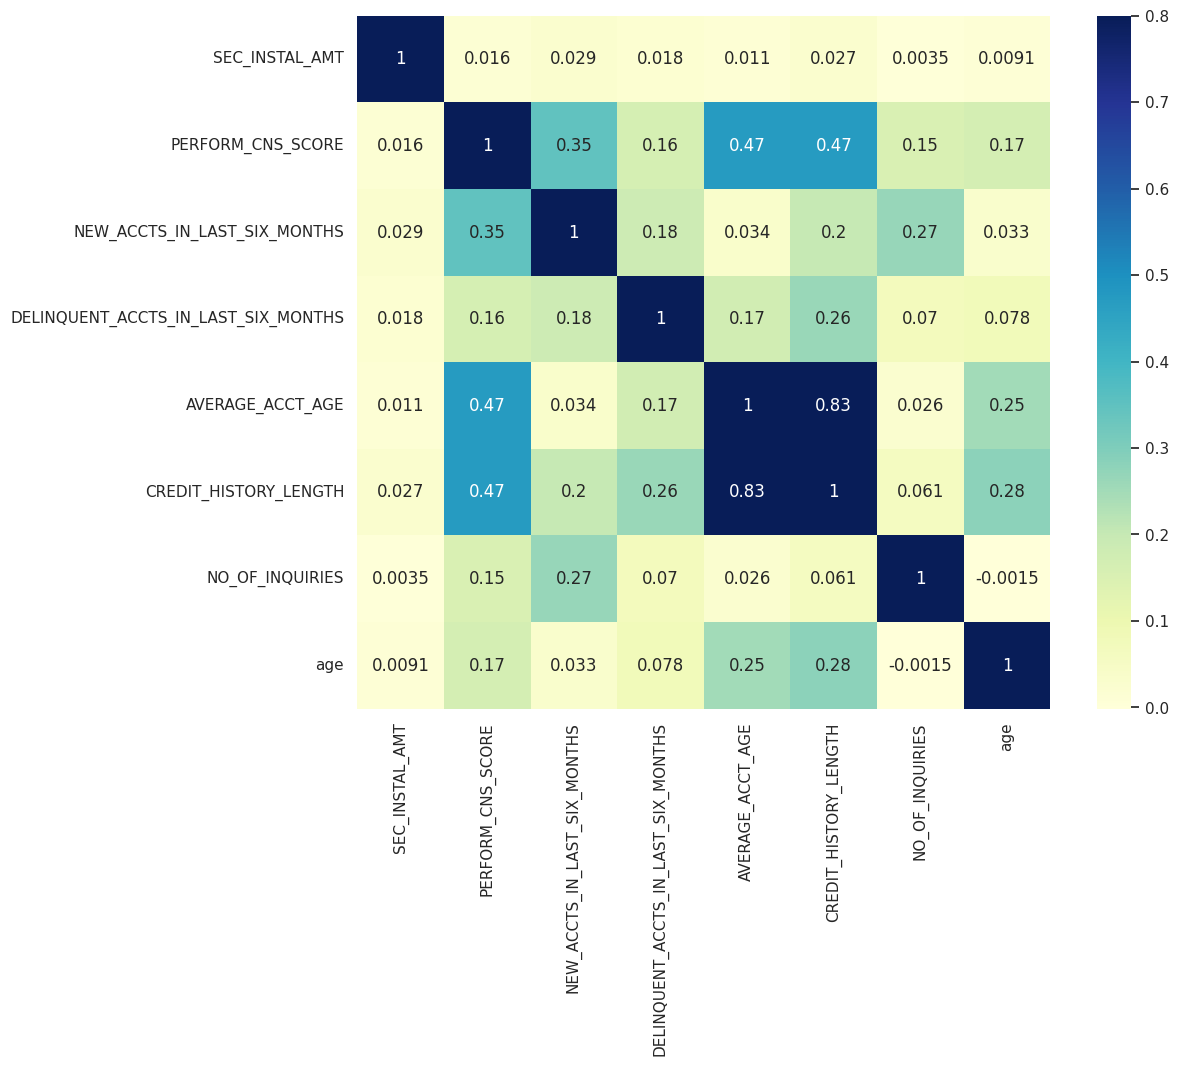

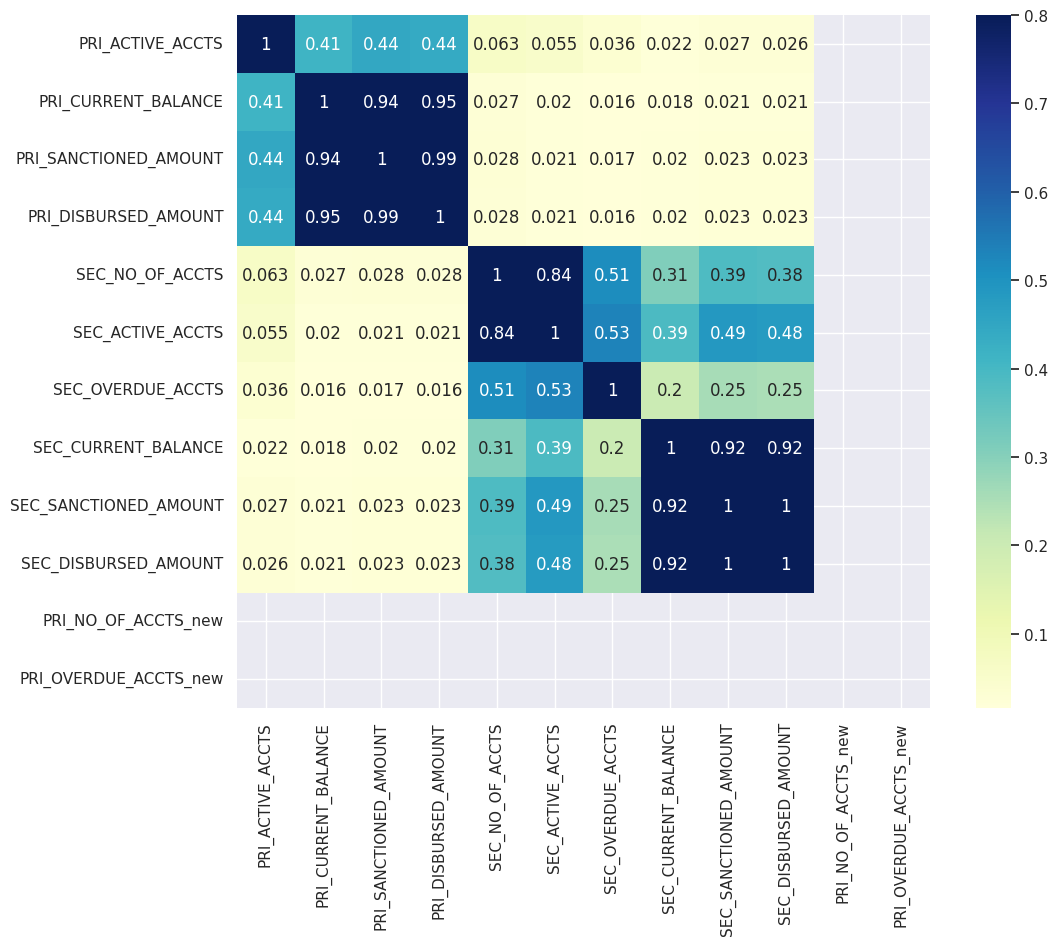

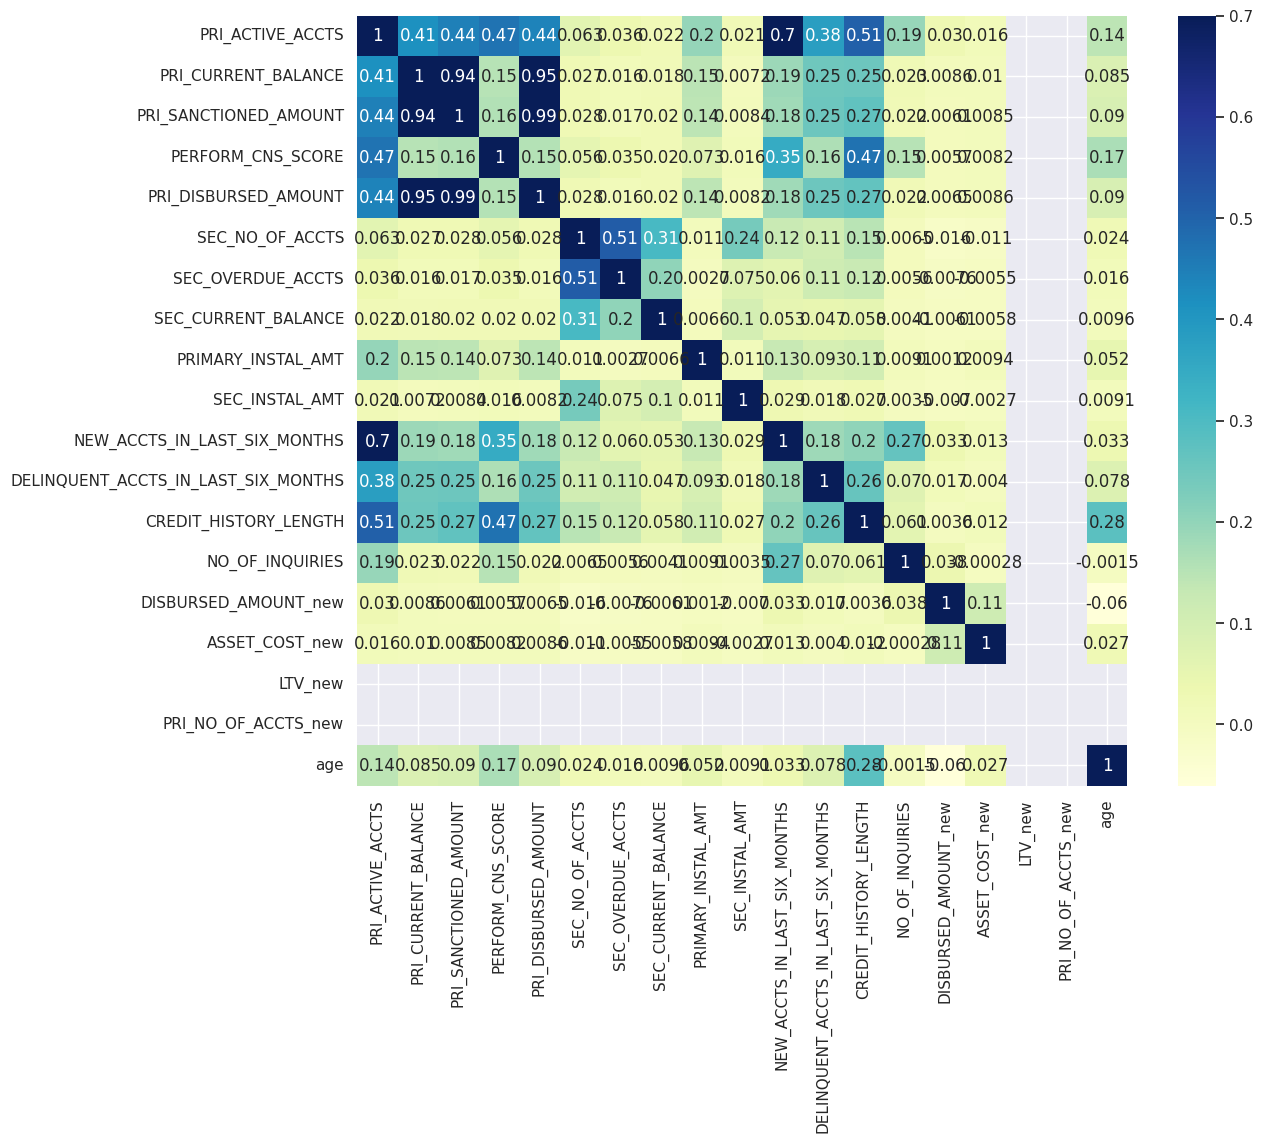

In [5]:
%run /kaggle/working/ads_fraud_detection/src/prj2/1.EDA/EDA_mainbaseline_kaggle.ipynb

In [6]:
%run /kaggle/working/ads_fraud_detection/src/prj2/2.preprocessing/1.base/pre-processing-mainbaseline_noSMOTE_kaggle.ipynb

/kaggle/working/ads_fraud_detection
+ X_train: 186523
Fold 0: 
+ train_idx: [     1      2      3 ... 186516 186518 186520]
+ valid_idx: [     0     11     12 ... 186519 186521 186522]
+ train / valid: [     0     11     12 ... 186519 186521 186522]
Fold 1: 
+ train_idx: [     0      1      2 ... 186519 186521 186522]
+ valid_idx: [     4     23     30 ... 186514 186515 186520]
+ train / valid: [     4     23     30 ... 186514 186515 186520]
Fold 2: 
+ train_idx: [     0      1      2 ... 186520 186521 186522]
+ valid_idx: [     3      8     14 ... 186506 186512 186516]
+ train / valid: [     3      8     14 ... 186506 186512 186516]
Fold 3: 
+ train_idx: [     0      3      4 ... 186520 186521 186522]
+ valid_idx: [     1      2      6 ... 186498 186499 186508]
+ train / valid: [     1      2      6 ... 186498 186499 186508]
Fold 4: 
+ train_idx: [     0      1      2 ... 186520 186521 186522]
+ valid_idx: [     5     10     15 ... 186510 186513 186518]
+ train / valid: [     5     10

In [7]:
import tensorflow as tf

# Kiểm tra phiên bản TensorFlow
print("TensorFlow version:", tf.__version__)

# Kiểm tra xem TensorFlow có phát hiện GPU hay không
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Số lượng GPU được phát hiện: {len(gpus)}")
    for gpu in gpus:
        print(f"  - {gpu}")
else:
    print("Không có GPU nào được phát hiện. TensorFlow đang sử dụng CPU.")

# # Kiểm tra xem GPU có được sử dụng trong quá trình tính toán hay không
# with tf.device('/GPU:0'):  # Thử sử dụng GPU
#     a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
#     b

TensorFlow version: 2.17.1
Số lượng GPU được phát hiện: 1
  - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


/kaggle/working/ads_fraud_detection
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
(46631, 2) (186523, 2)
(46631, 2)
43


Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 43, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 21, 16)         │             64 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 21, 16)         │             63 │ conv1d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 21, 16)         │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 19, 16)         │            784 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 19, 16)         │             57 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 19, 16)         │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 19, 32)         │          1,568 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 19, 32)         │             57 │ conv1d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 19, 32)         │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 9, 32)          │              0 │ activation_2[0][0]     │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 9, 80)          │          2,640 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 9, 80)          │             27 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 9, 80)          │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 7, 192)         │         46,272 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 7, 192)         │             21 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 24,308,632 (92.73 MB)

 Trainable params: 24,307,476 (92.73 MB)

 Non-trainable params: 1,156 (4.52 KB)

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 43, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 21, 16)         │             64 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 21, 16)         │             63 │ conv1d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 21, 16)         │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 19, 16)         │            784 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 19, 16)         │             57 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 19, 16)         │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 19, 32)         │          1,568 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 19, 32)         │             57 │ conv1d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 19, 32)         │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 9, 32)          │              0 │ activation_2[0][0]     │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 9, 80)          │          2,640 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 9, 80)          │             27 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 9, 80)          │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 7, 192)         │         46,272 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 7, 192)         │             21 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 24,308,632 (92.73 MB)

 Trainable params: 24,307,476 (92.73 MB)

 Non-trainable params: 1,156 (4.52 KB)

Epoch 1/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 366s 245ms/step - accuracy: 0.5269 - f1_score: 0.4389 - loss: 0.7303 - val_accuracy: 0.6595 - val_f1_score: 0.5172 - val_loss: 0.6176 - learning_rate: 1.0000e-04
Epoch 2/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 86s 117ms/step - accuracy: 0.5621 - f1_score: 0.5172 - loss: 0.6716 - val_accuracy: 0.4699 - val_f1_score: 0.4471 - val_loss: 0.7260 - learning_rate: 1.0000e-04
Epoch 3/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 85s 117ms/step - accuracy: 0.5479 - f1_score: 0.5118 - loss: 0.6725 - val_accuracy: 0.5513 - val_f1_score: 0.4925 - val_loss: 0.6804 - learning_rate: 1.0000e-04
Epoch 4/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.5564 - f1_score: 0.5187 - loss: 0.6691
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
729/729 ━━━━━━━━━━━━━━━━━━━━ 86s 118ms/step - accuracy: 0.5564 - f1_score: 0.5186 - loss: 0.6691 - val_accuracy: 0.4571 - val_f1_score: 0.4375 - val_loss: 0.7246 - learning_rate: 1.0000e-04
Epoch 5/1200
72

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 43, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 21, 16)         │             64 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 21, 16)         │             63 │ conv1d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 21, 16)         │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 19, 16)         │            784 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 19, 16)         │             57 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 19, 16)         │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 19, 32)         │          1,568 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 19, 32)         │             57 │ conv1d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 19, 32)         │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 9, 32)          │              0 │ activation_2[0][0]     │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 9, 80)          │          2,640 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 9, 80)          │             27 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 9, 80)          │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 7, 192)         │         46,272 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 7, 192)         │             21 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 72,923,586 (278.18 MB)

 Trainable params: 24,307,476 (92.73 MB)

 Non-trainable params: 1,156 (4.52 KB)

 Optimizer params: 48,614,954 (185.45 MB)

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 43, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 21, 16)         │             64 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 21, 16)         │             63 │ conv1d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 21, 16)         │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 19, 16)         │            784 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 19, 16)         │             57 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 19, 16)         │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 19, 32)         │          1,568 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 19, 32)         │             57 │ conv1d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 19, 32)         │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 9, 32)          │              0 │ activation_2[0][0]     │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 9, 80)          │          2,640 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 9, 80)          │             27 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 9, 80)          │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 7, 192)         │         46,272 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 7, 192)         │             21 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 72,923,586 (278.18 MB)

 Trainable params: 24,307,476 (92.73 MB)

 Non-trainable params: 1,156 (4.52 KB)

 Optimizer params: 48,614,954 (185.45 MB)

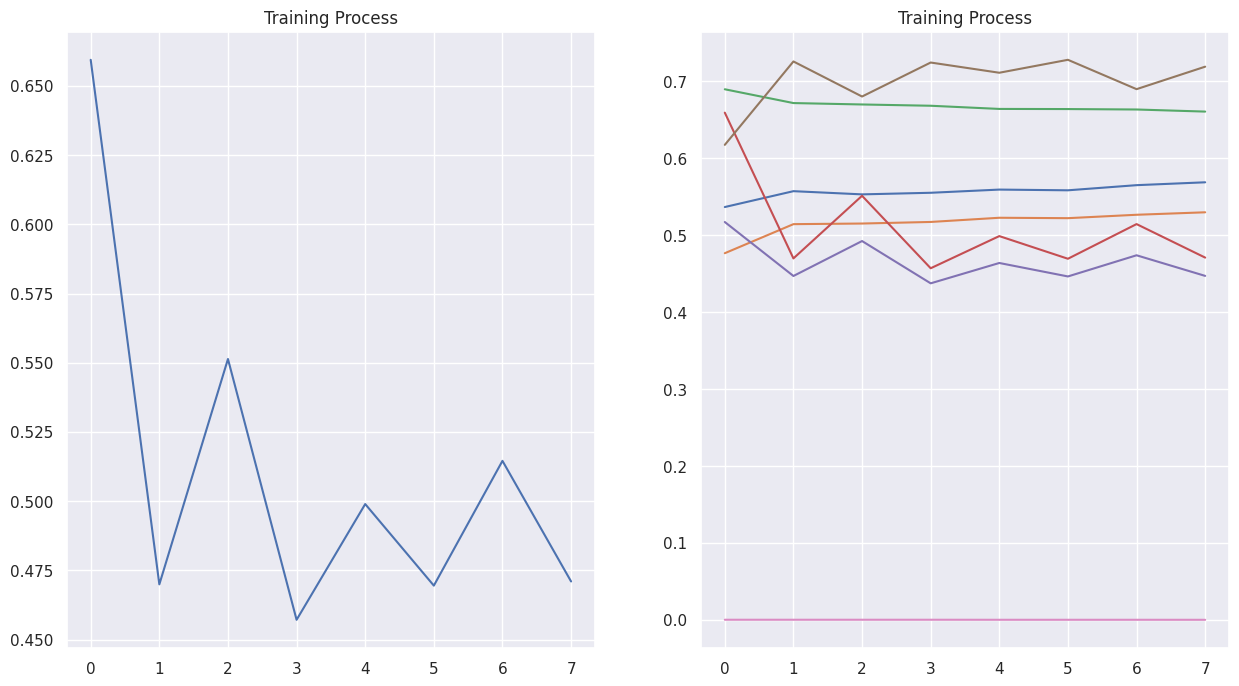

<Figure size 640x480 with 0 Axes>

1458/1458 ━━━━━━━━━━━━━━━━━━━━ 48s 24ms/step
Accuracy: 0.659475456241556
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78     36323
           1       0.25      0.27      0.26     10308

    accuracy                           0.66     46631
   macro avg       0.52      0.52      0.52     46631
weighted avg       0.67      0.66      0.66     46631

Confusion Matrix:
[[27942  8381]
 [ 7498  2810]]


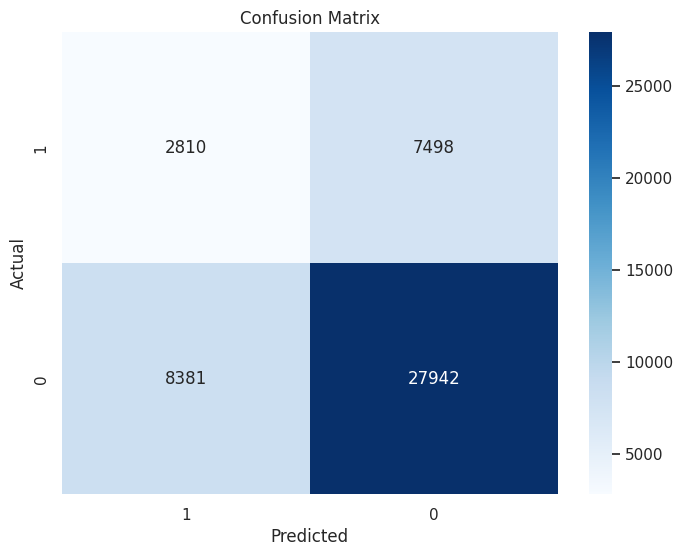

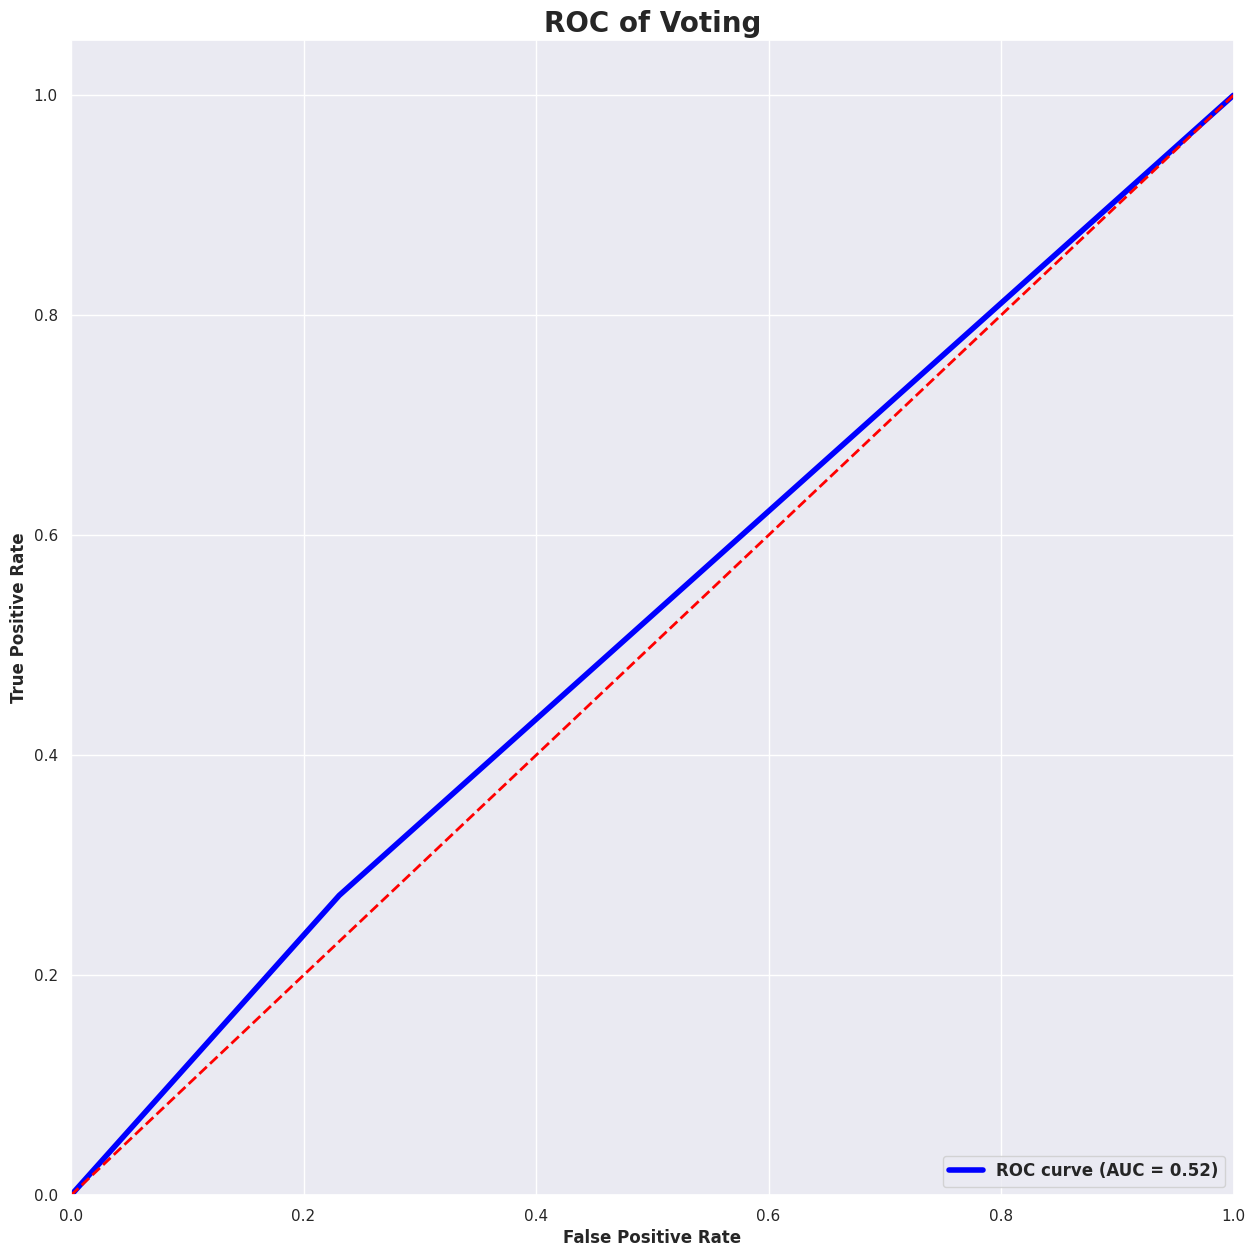

In [ ]:
%run /kaggle/working/ads_fraud_detection/src/prj2/5.deep_learning_model/1.base/InceptionV2/inceptionv2_class_weight_kaggle.ipynb

/kaggle/working/ads_fraud_detection
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
(46631, 2) (186523, 2)
(46631, 2)
43


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 43, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_203 (Conv1D)       │ (None, 21, 32)         │             96 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_203   │ (None, 21, 32)         │             63 │ conv1d_203[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_203            │ (None, 21, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_204 (Conv1D)       │ (None, 19, 32)         │          3,072 │ activation_203[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_204   │ (None, 19, 32)         │             57 │ conv1d_204[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_204            │ (None, 19, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_205 (Conv1D)       │ (None, 17, 64)         │          6,144 │ activation_204[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_205   │ (None, 17, 64)         │             51 │ conv1d_205[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_205            │ (None, 17, 64)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 8, 64)          │              0 │ activation_205[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_209 (Conv1D)       │ (None, 8, 64)          │          4,096 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_209   │ (None, 8, 64)          │             24 │ conv1d_209[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_209            │ (None, 8, 64)          │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_207 (Conv1D)  

 Total params: 1,973,225 (7.53 MB)

 Trainable params: 1,972,623 (7.52 MB)

 Non-trainable params: 602 (2.35 KB)

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 43, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_203 (Conv1D)       │ (None, 21, 32)         │             96 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_203   │ (None, 21, 32)         │             63 │ conv1d_203[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_203            │ (None, 21, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_204 (Conv1D)       │ (None, 19, 32)         │          3,072 │ activation_203[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_204   │ (None, 19, 32)         │             57 │ conv1d_204[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_204            │ (None, 19, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_205 (Conv1D)       │ (None, 17, 64)         │          6,144 │ activation_204[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_205   │ (None, 17, 64)         │             51 │ conv1d_205[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_205            │ (None, 17, 64)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 8, 64)          │              0 │ activation_205[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_209 (Conv1D)       │ (None, 8, 64)          │          4,096 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_209   │ (None, 8, 64)          │             24 │ conv1d_209[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_209            │ (None, 8, 64)          │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_207 (Conv1D)  

 Total params: 1,973,225 (7.53 MB)

 Trainable params: 1,972,623 (7.52 MB)

 Non-trainable params: 602 (2.35 KB)

Epoch 1/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 65s 49ms/step - accuracy: 0.5470 - f1_score: 0.4685 - loss: 0.6909 - val_accuracy: 0.5243 - val_f1_score: 0.4785 - val_loss: 0.6860 - learning_rate: 1.0000e-04
Epoch 2/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.5560 - f1_score: 0.5114 - loss: 0.6707 - val_accuracy: 0.5716 - val_f1_score: 0.4998 - val_loss: 0.6726 - learning_rate: 1.0000e-04
Epoch 3/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.5560 - f1_score: 0.5169 - loss: 0.6702 - val_accuracy: 0.4542 - val_f1_score: 0.4355 - val_loss: 0.7373 - learning_rate: 1.0000e-04
Epoch 4/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.5640 - f1_score: 0.5193 - loss: 0.6662 - val_accuracy: 0.4979 - val_f1_score: 0.4634 - val_loss: 0.6952 - learning_rate: 1.0000e-04
Epoch 5/1200
727/729 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5695 - f1_score: 0.5262 - loss: 0.6631
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
729/729 

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 43, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_203 (Conv1D)       │ (None, 21, 32)         │             96 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_203   │ (None, 21, 32)         │             63 │ conv1d_203[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_203            │ (None, 21, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_204 (Conv1D)       │ (None, 19, 32)         │          3,072 │ activation_203[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_204   │ (None, 19, 32)         │             57 │ conv1d_204[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_204            │ (None, 19, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_205 (Conv1D)       │ (None, 17, 64)         │          6,144 │ activation_204[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_205   │ (None, 17, 64)         │             51 │ conv1d_205[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_205            │ (None, 17, 64)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 8, 64)          │              0 │ activation_205[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_209 (Conv1D)       │ (None, 8, 64)          │          4,096 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_209   │ (None, 8, 64)          │             24 │ conv1d_209[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_209            │ (None, 8, 64)          │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_207 (Conv1D)  

 Total params: 5,918,473 (22.58 MB)

 Trainable params: 1,972,623 (7.52 MB)

 Non-trainable params: 602 (2.35 KB)

 Optimizer params: 3,945,248 (15.05 MB)

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 43, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_203 (Conv1D)       │ (None, 21, 32)         │             96 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_203   │ (None, 21, 32)         │             63 │ conv1d_203[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_203            │ (None, 21, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_204 (Conv1D)       │ (None, 19, 32)         │          3,072 │ activation_203[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_204   │ (None, 19, 32)         │             57 │ conv1d_204[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_204            │ (None, 19, 32)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_205 (Conv1D)       │ (None, 17, 64)         │          6,144 │ activation_204[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_205   │ (None, 17, 64)         │             51 │ conv1d_205[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_205            │ (None, 17, 64)         │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 8, 64)          │              0 │ activation_205[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_209 (Conv1D)       │ (None, 8, 64)          │          4,096 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_209   │ (None, 8, 64)          │             24 │ conv1d_209[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_209            │ (None, 8, 64)          │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_207 (Conv1D)  

 Total params: 5,918,473 (22.58 MB)

 Trainable params: 1,972,623 (7.52 MB)

 Non-trainable params: 602 (2.35 KB)

 Optimizer params: 3,945,248 (15.05 MB)

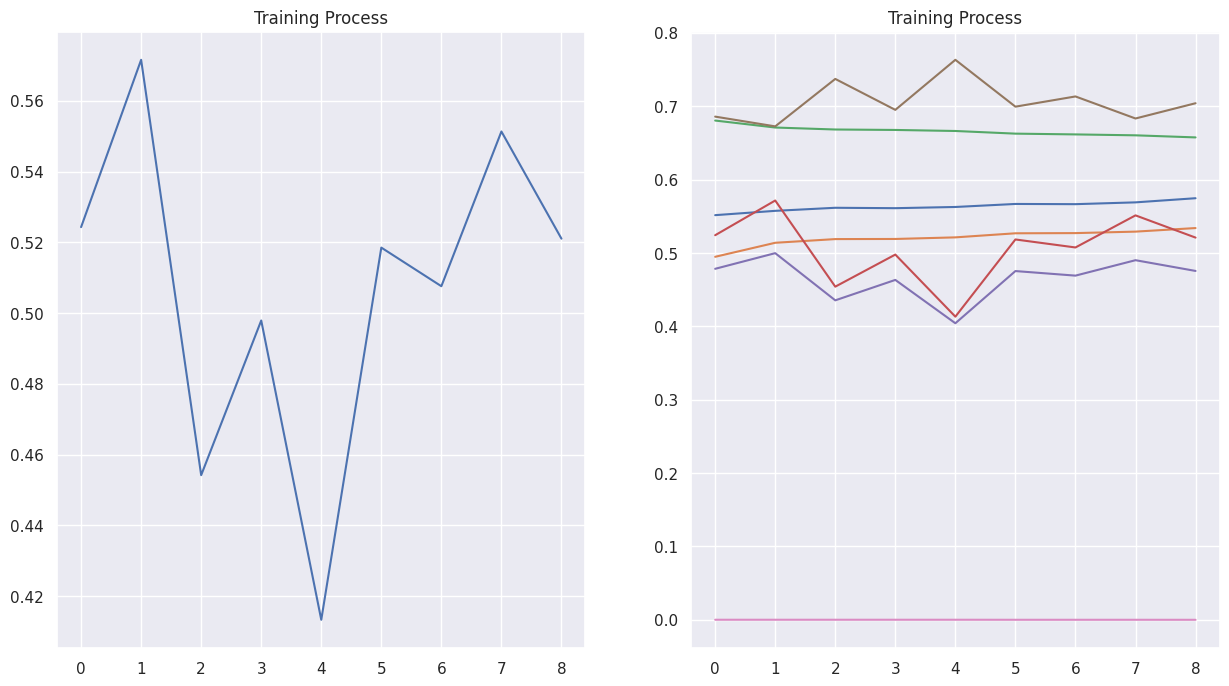

<Figure size 640x480 with 0 Axes>

1458/1458 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step
Accuracy: 0.5715940039887628
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69     36323
           1       0.24      0.45      0.32     10308

    accuracy                           0.57     46631
   macro avg       0.52      0.53      0.50     46631
weighted avg       0.67      0.57      0.61     46631

Confusion Matrix:
[[22041 14282]
 [ 5695  4613]]


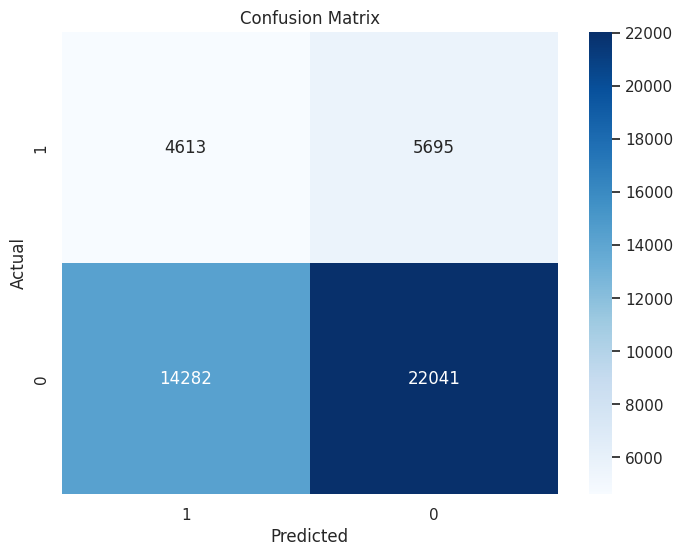

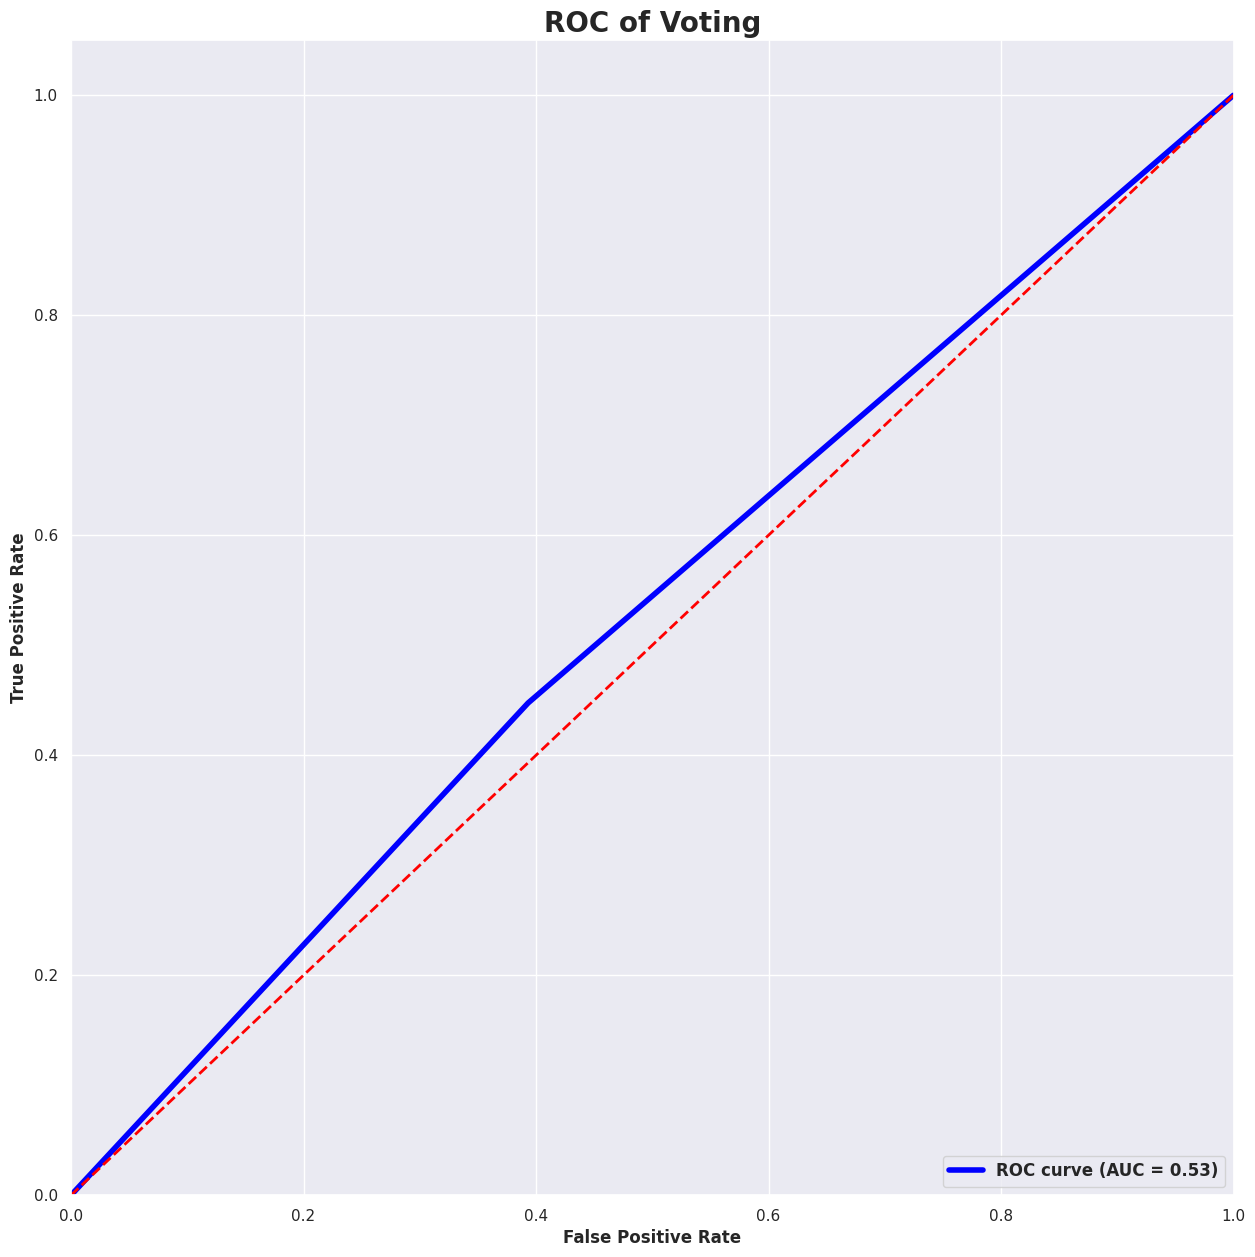

In [9]:
%run /kaggle/working/ads_fraud_detection/src/prj2/5.deep_learning_model/1.base/InceptionV3/inceptionv3_class_weight_kaggle.ipynb

/kaggle/working/ads_fraud_detection
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
(46631, 2) (186523, 2)
(46631, 2)
43


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 43, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv1D)                │ (None, 43, 128)             │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv1D)                │ (None, 43, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling1D)           │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv1D)                │ (None, 21, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv1D)                │ (None, 21, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling1D)           │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv1D)                │ (None, 10, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv1D)                │ (None, 10, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv1D)                │ (None, 10, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling1D)           │ (None, 5, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv1D)                │ (None, 5, 1024)             │       1,573,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling1D)           │ (None, 2, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling1D)           │ (None, 1, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 2)                   │           2,0

 Total params: 19,622,530 (74.85 MB)

 Trainable params: 19,622,530 (74.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.5771 - f1_score: 0.4895 - loss: 0.6789 - val_accuracy: 0.6216 - val_f1_score: 0.5123 - val_loss: 0.6477 - learning_rate: 1.0000e-04
Epoch 2/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5608 - f1_score: 0.5211 - loss: 0.6682 - val_accuracy: 0.4871 - val_f1_score: 0.4544 - val_loss: 0.7138 - learning_rate: 1.0000e-04
Epoch 3/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5617 - f1_score: 0.5214 - loss: 0.6664 - val_accuracy: 0.5209 - val_f1_score: 0.4740 - val_loss: 0.7042 - learning_rate: 1.0000e-04
Epoch 4/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5619 - f1_score: 0.5231 - loss: 0.6668
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
729/729 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5619 - f1_score: 0.5232 - loss: 0.6668 - val_accuracy: 0.5317 - val_f1_score: 0.4796 - val_loss: 0.6888 - learning_rate: 1.0000e-04
Epoch 5/1200
729/729 

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 43, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv1D)                │ (None, 43, 128)             │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv1D)                │ (None, 43, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling1D)           │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv1D)                │ (None, 21, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv1D)                │ (None, 21, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling1D)           │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv1D)                │ (None, 10, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv1D)                │ (None, 10, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv1D)                │ (None, 10, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling1D)           │ (None, 5, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv1D)                │ (None, 5, 1024)             │       1,573,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling1D)           │ (None, 2, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling1D)           │ (None, 1, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 2)                   │           2,0

 Total params: 58,867,592 (224.56 MB)

 Trainable params: 19,622,530 (74.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,245,062 (149.71 MB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 43, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv1D)                │ (None, 43, 128)             │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv1D)                │ (None, 43, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling1D)           │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv1D)                │ (None, 21, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv1D)                │ (None, 21, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling1D)           │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv1D)                │ (None, 10, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv1D)                │ (None, 10, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv1D)                │ (None, 10, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling1D)           │ (None, 5, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv1D)                │ (None, 5, 1024)             │       1,573,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling1D)           │ (None, 2, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling1D)           │ (None, 1, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 2)                   │           2,0

 Total params: 58,867,592 (224.56 MB)

 Trainable params: 19,622,530 (74.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,245,062 (149.71 MB)

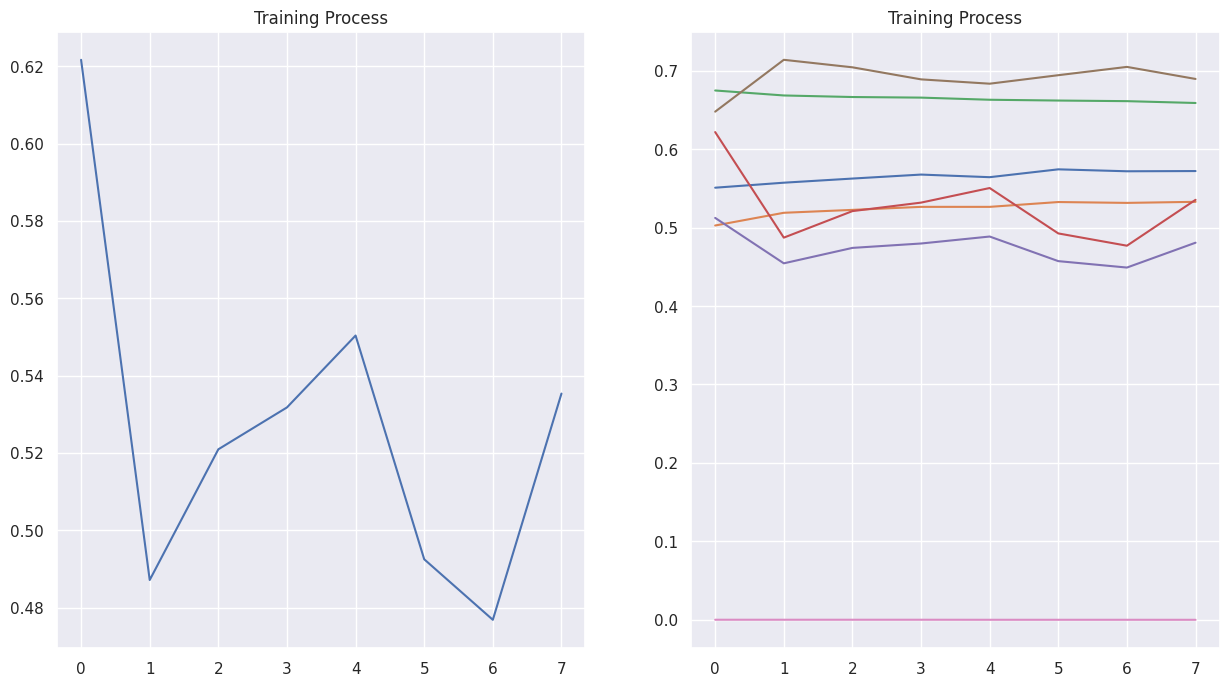

<Figure size 640x480 with 0 Axes>

1458/1458 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
Accuracy: 0.6216465441444533
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74     36323
           1       0.25      0.35      0.29     10308

    accuracy                           0.62     46631
   macro avg       0.52      0.52      0.51     46631
weighted avg       0.67      0.62      0.64     46631

Confusion Matrix:
[[25431 10892]
 [ 6751  3557]]


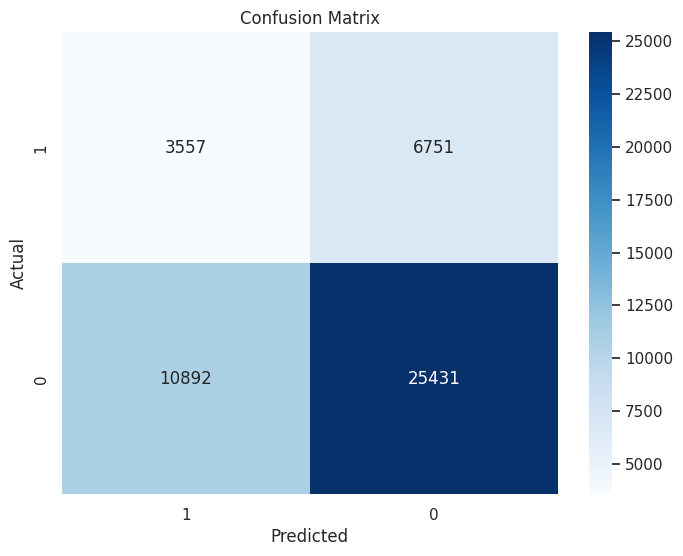

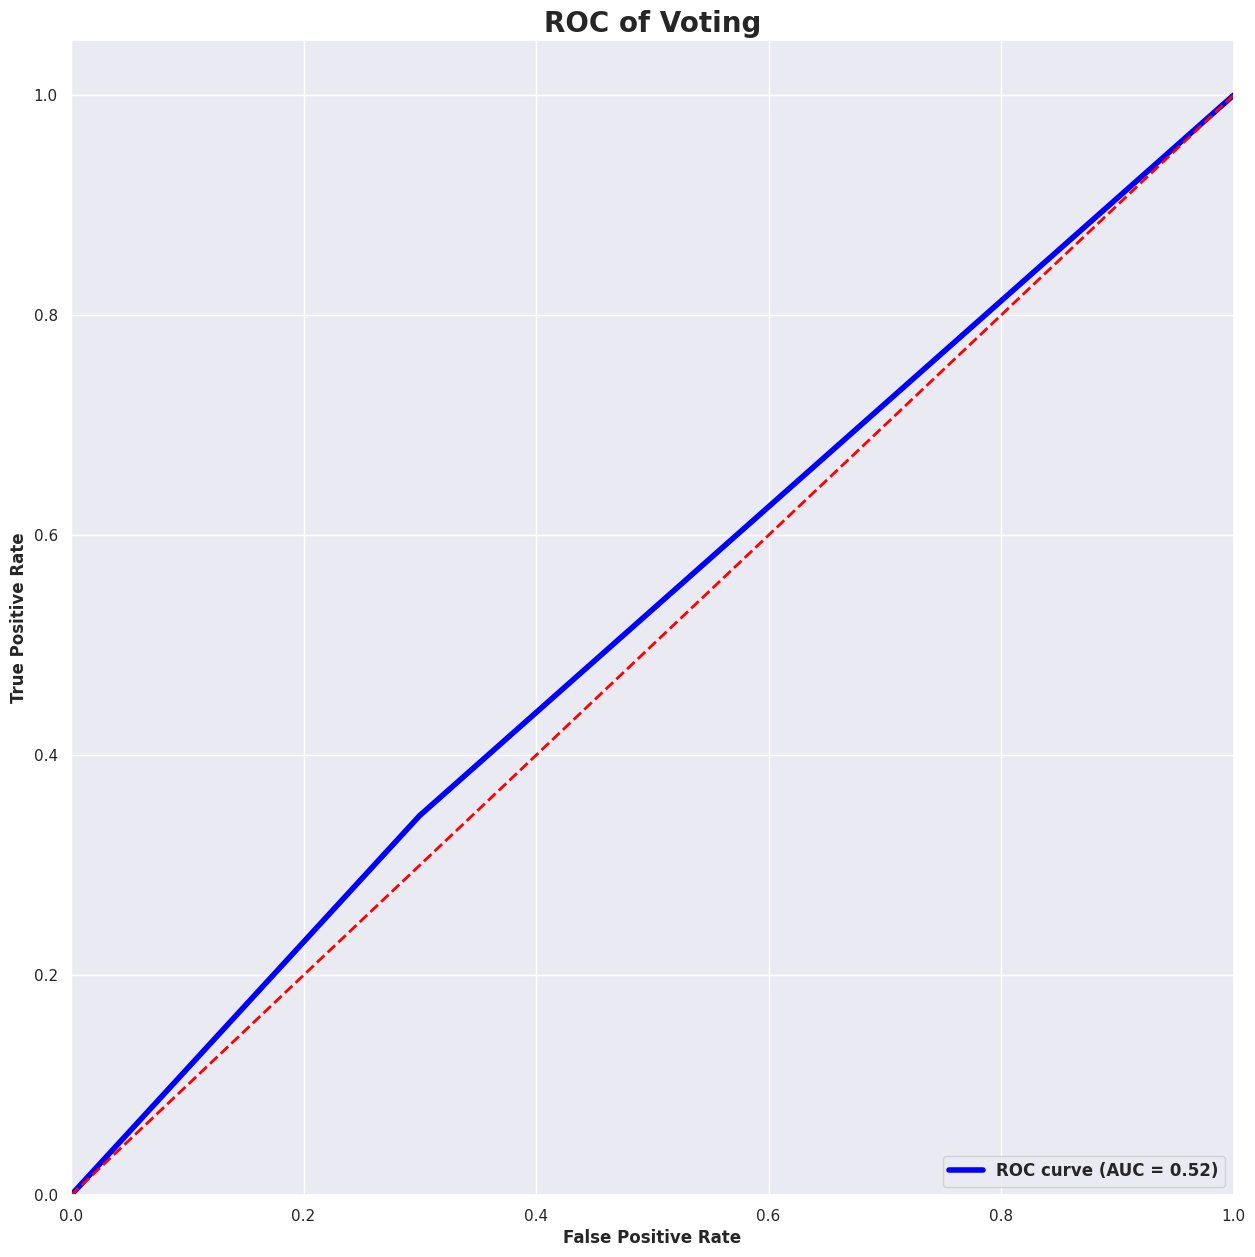

In [10]:
%run /kaggle/working/ads_fraud_detection/src/prj2/5.deep_learning_model/1.base/VGG16/vgg16_class_weight_kaggle.ipynb

/kaggle/working/ads_fraud_detection
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
(46631, 2) (186523, 2)
(46631, 2)
43


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 43, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv1D)                │ (None, 43, 256)             │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv1D)                │ (None, 43, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling1D)           │ (None, 21, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv1D)                │ (None, 21, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv1D)                │ (None, 21, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling1D)           │ (None, 10, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv1D)                │ (None, 10, 768)             │       1,180,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv1D)                │ (None, 10, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv1D)                │ (None, 10, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv1D)                │ (None, 10, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling1D)           │ (None, 5, 768)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv1D)                │ (None, 5, 1024)             │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling1D)           │ (None, 2, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 32,259,330 (123.06 MB)

 Trainable params: 32,259,330 (123.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 64s 74ms/step - accuracy: 0.5568 - f1_score: 0.4758 - loss: 0.6835 - val_accuracy: 0.5118 - val_f1_score: 0.4698 - val_loss: 0.6814 - learning_rate: 1.0000e-04
Epoch 2/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - accuracy: 0.5363 - f1_score: 0.5049 - loss: 0.6723 - val_accuracy: 0.5148 - val_f1_score: 0.4722 - val_loss: 0.6775 - learning_rate: 1.0000e-04
Epoch 3/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - accuracy: 0.5549 - f1_score: 0.5189 - loss: 0.6669 - val_accuracy: 0.5336 - val_f1_score: 0.4804 - val_loss: 0.6893 - learning_rate: 1.0000e-04
Epoch 4/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - accuracy: 0.5658 - f1_score: 0.5228 - loss: 0.6661 - val_accuracy: 0.5302 - val_f1_score: 0.4799 - val_loss: 0.6927 - learning_rate: 1.0000e-04
Epoch 5/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - accuracy: 0.5603 - f1_score: 0.5210 - loss: 0.6670 - val_accuracy: 0.5476 - val_f1_score: 0.4862 - val_loss: 0.6809 - learning_rate: 1

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 43, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv1D)                │ (None, 43, 256)             │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv1D)                │ (None, 43, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling1D)           │ (None, 21, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv1D)                │ (None, 21, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv1D)                │ (None, 21, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling1D)           │ (None, 10, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv1D)                │ (None, 10, 768)             │       1,180,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv1D)                │ (None, 10, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv1D)                │ (None, 10, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv1D)                │ (None, 10, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling1D)           │ (None, 5, 768)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv1D)                │ (None, 5, 1024)             │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling1D)           │ (None, 2, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 96,777,992 (369.18 MB)

 Trainable params: 32,259,330 (123.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,518,662 (246.12 MB)

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 43, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv1D)                │ (None, 43, 256)             │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv1D)                │ (None, 43, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling1D)           │ (None, 21, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv1D)                │ (None, 21, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv1D)                │ (None, 21, 512)             │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling1D)           │ (None, 10, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv1D)                │ (None, 10, 768)             │       1,180,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv1D)                │ (None, 10, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv1D)                │ (None, 10, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv1D)                │ (None, 10, 768)             │       1,770,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling1D)           │ (None, 5, 768)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv1D)                │ (None, 5, 1024)             │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv1D)                │ (None, 5, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling1D)           │ (None, 2, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv1D)                │ (None, 2, 1024)             │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 96,777,992 (369.18 MB)

 Trainable params: 32,259,330 (123.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,518,662 (246.12 MB)

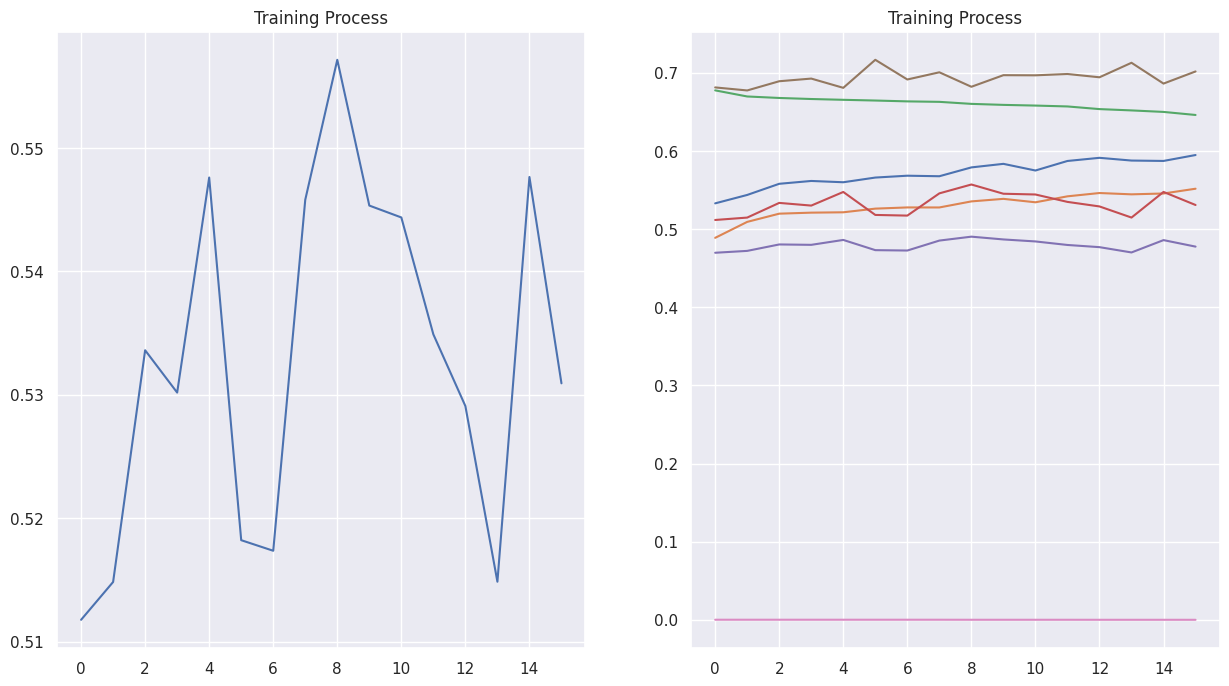

<Figure size 640x480 with 0 Axes>

1458/1458 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step
Accuracy: 0.5571615448950269
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.59      0.67     36323
           1       0.24      0.45      0.31     10308

    accuracy                           0.56     46631
   macro avg       0.51      0.52      0.49     46631
weighted avg       0.67      0.56      0.59     46631

Confusion Matrix:
[[21300 15023]
 [ 5627  4681]]


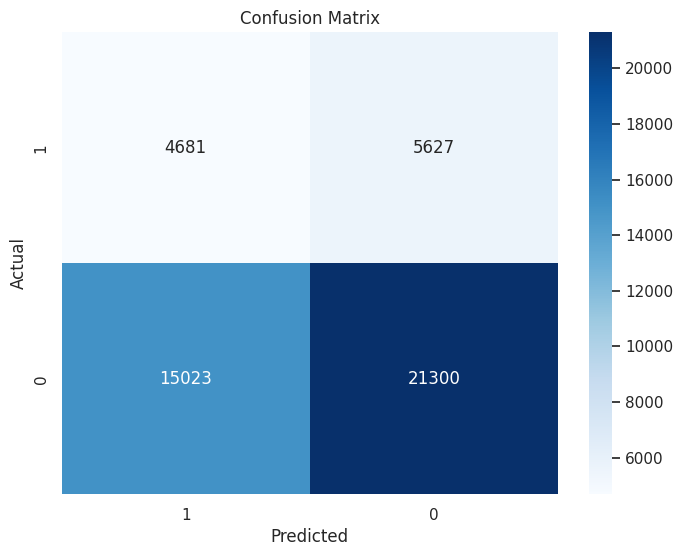

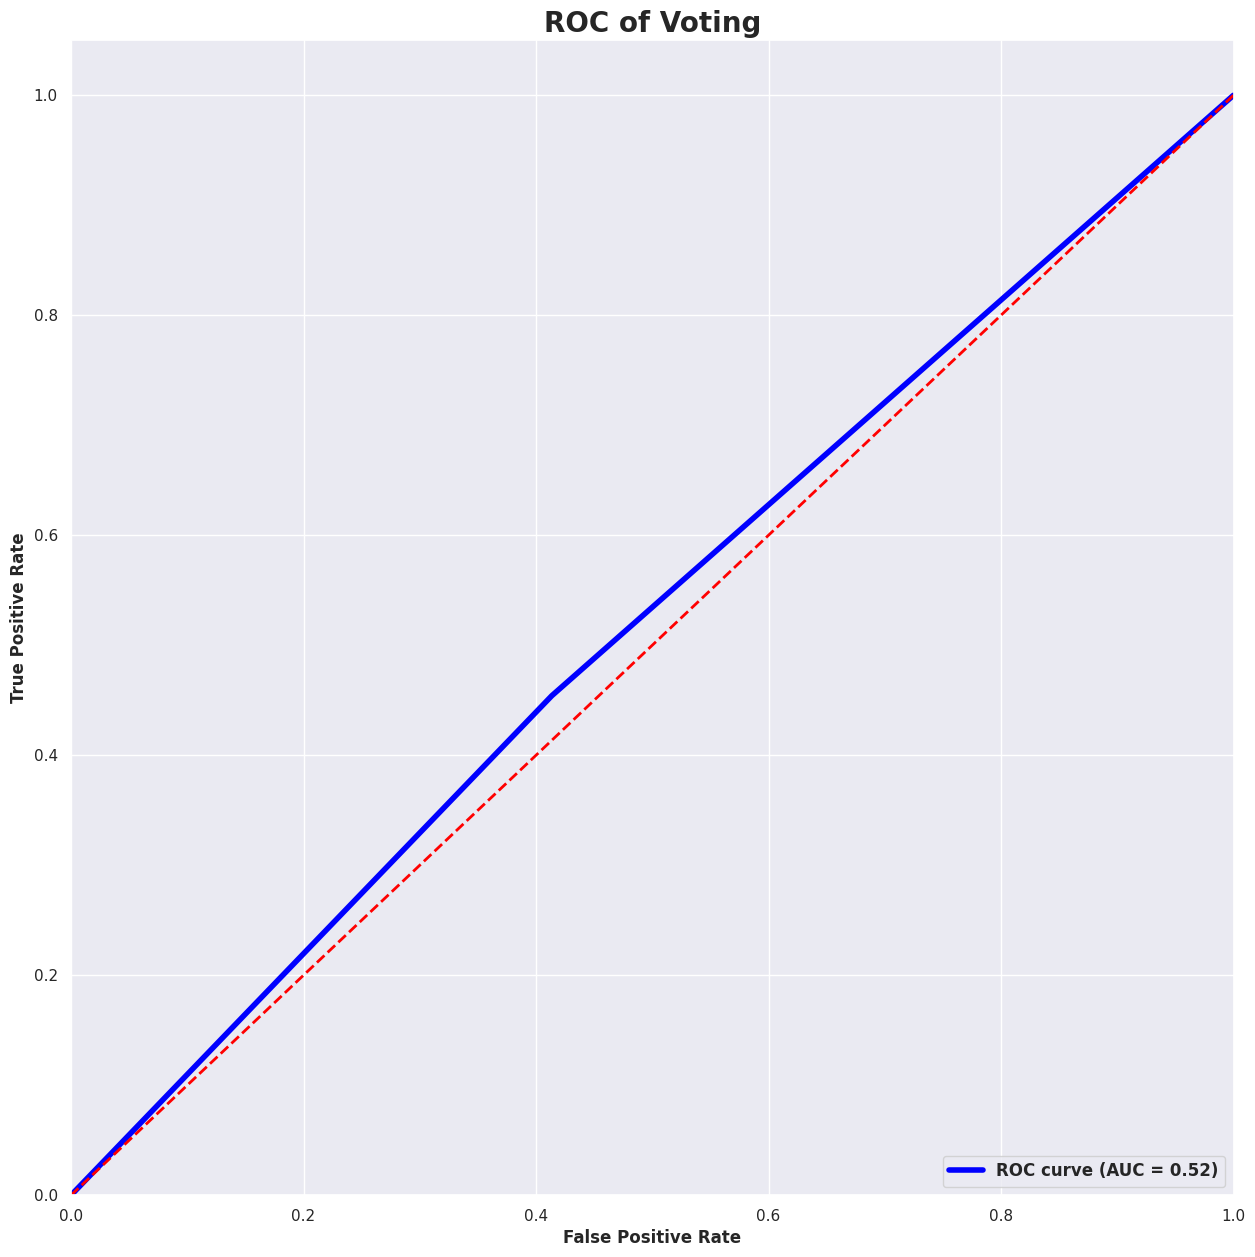

In [11]:
%run /kaggle/working/ads_fraud_detection/src/prj2/5.deep_learning_model/1.base/VGG19/vgg19_class_weight_kaggle.ipynb

/kaggle/working/ads_fraud_detection
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
(46631, 2) (186523, 2)
(46631, 2)
43


Model: "resnet50_1d"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 43, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding1d            │ (None, 45, 1)          │              0 │ input_layer_5[0][0]    │
│ (ZeroPadding1D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv1D)            │ (None, 23, 64)         │            512 │ zero_padding1d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_conv1                  │ (None, 23, 64)         │            256 │ conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_249            │ (None, 23, 64)         │              0 │ bn_conv1[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_5           │ (None, 11, 64)         │              0 │ activation_249[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2a (Conv1D)   │ (None, 11, 32)         │          2,080 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2a             │ (None, 11, 32)         │             44 │ res2a_branch2a[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_250            │ (None, 11, 32)         │              0 │ bn2a_branch2a[0][0]    │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2b (Conv1D)   │ (None, 11, 32)         │          3,104 │ activation_250[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2b             │ (None, 11, 32)         │             44 │ res2a_branch2b[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_251            │ (None, 11, 32)         │              0 │ bn2a_branch2b[0][0]    │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2c (Conv1D)   │ (None, 11, 96)         │          3,168 │ activation_251[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch1 (Conv1D)    │ (None, 11, 96)         │          6,240 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2c             │ (None, 11, 96)         │             44 │ res2a_branch2c[0][0]   │
│ (BatchNormalization) 

 Total params: 946,426 (3.61 MB)

 Trainable params: 945,918 (3.61 MB)

 Non-trainable params: 508 (1.98 KB)

Epoch 1/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - accuracy: 0.5020 - f1_score: 0.4390 - loss: 0.7746 - val_accuracy: 0.5554 - val_f1_score: 0.4903 - val_loss: 0.6704 - learning_rate: 0.0010
Epoch 2/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5383 - f1_score: 0.5044 - loss: 0.6729 - val_accuracy: 0.4095 - val_f1_score: 0.4018 - val_loss: 0.7390 - learning_rate: 0.0010
Epoch 3/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5451 - f1_score: 0.5111 - loss: 0.6702 - val_accuracy: 0.4893 - val_f1_score: 0.4544 - val_loss: 0.7045 - learning_rate: 0.0010
Epoch 4/1200
729/729 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5632 - f1_score: 0.5222 - loss: 0.6648
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
729/729 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5632 - f1_score: 0.5222 - loss: 0.6648 - val_accuracy: 0.5129 - val_f1_score: 0.4667 - val_loss: 0.6911 - learning_rate: 0.0010
Epoch 5/1200
729/729 ━━━━━━━━━━━━━━━━

Model: "resnet50_1d"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 43, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding1d            │ (None, 45, 1)          │              0 │ input_layer_5[0][0]    │
│ (ZeroPadding1D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv1D)            │ (None, 23, 64)         │            512 │ zero_padding1d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_conv1                  │ (None, 23, 64)         │            256 │ conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_249            │ (None, 23, 64)         │              0 │ bn_conv1[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_5           │ (None, 11, 64)         │              0 │ activation_249[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2a (Conv1D)   │ (None, 11, 32)         │          2,080 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2a             │ (None, 11, 32)         │             44 │ res2a_branch2a[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_250            │ (None, 11, 32)         │              0 │ bn2a_branch2a[0][0]    │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2b (Conv1D)   │ (None, 11, 32)         │          3,104 │ activation_250[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2b             │ (None, 11, 32)         │             44 │ res2a_branch2b[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_251            │ (None, 11, 32)         │              0 │ bn2a_branch2b[0][0]    │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2c (Conv1D)   │ (None, 11, 96)         │          3,168 │ activation_251[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch1 (Conv1D)    │ (None, 11, 96)         │          6,240 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2c             │ (None, 11, 96)         │             44 │ res2a_branch2c[0][0]   │
│ (BatchNormalization) 

 Total params: 2,838,264 (10.83 MB)

 Trainable params: 945,918 (3.61 MB)

 Non-trainable params: 508 (1.98 KB)

 Optimizer params: 1,891,838 (7.22 MB)

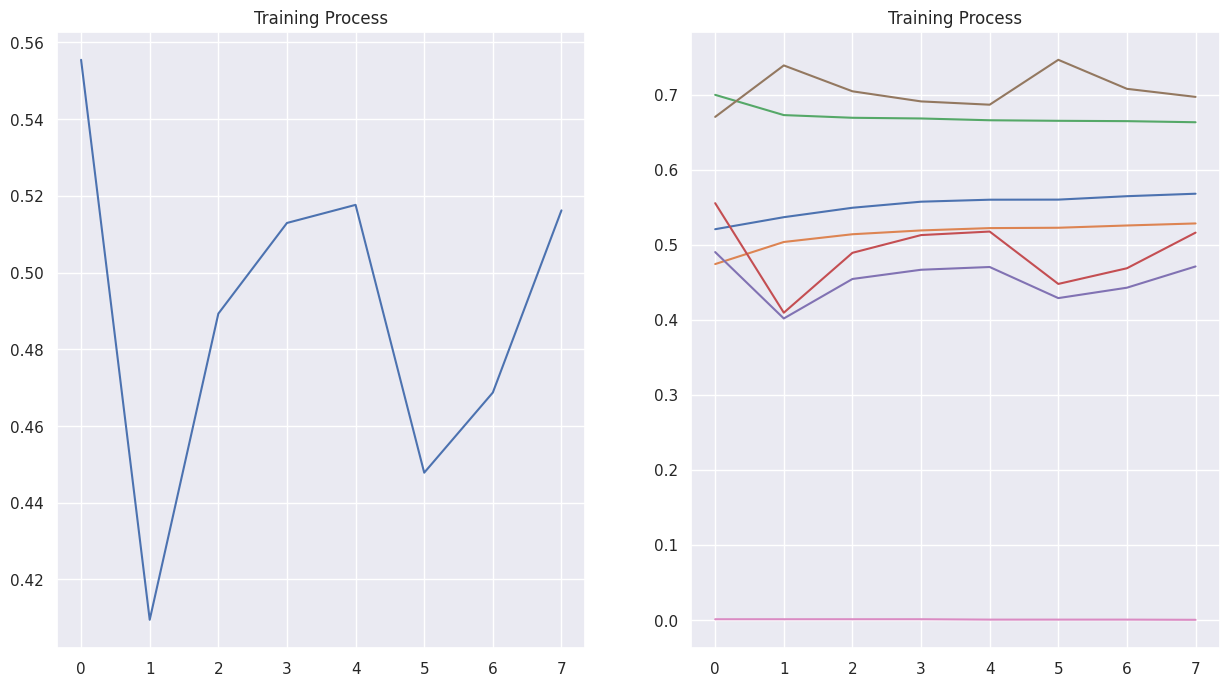

<Figure size 640x480 with 0 Axes>

1458/1458 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
Accuracy: 0.5554459479745234
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.58      0.67     36323
           1       0.24      0.46      0.31     10308

    accuracy                           0.56     46631
   macro avg       0.51      0.52      0.49     46631
weighted avg       0.67      0.56      0.59     46631

Confusion Matrix:
[[21197 15126]
 [ 5604  4704]]


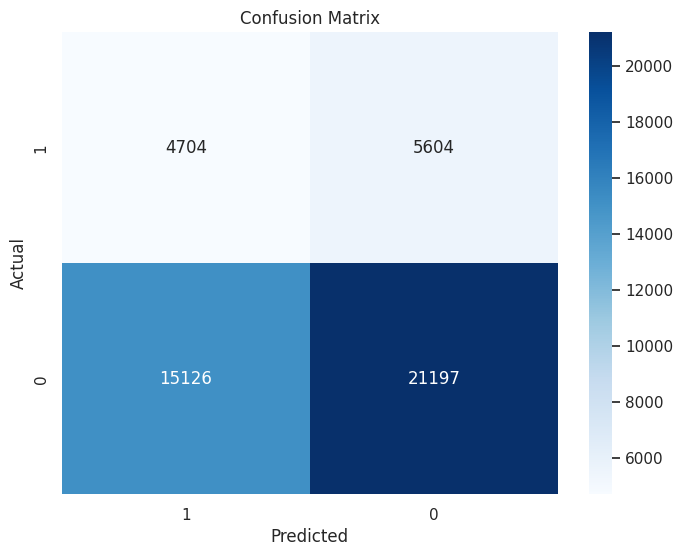

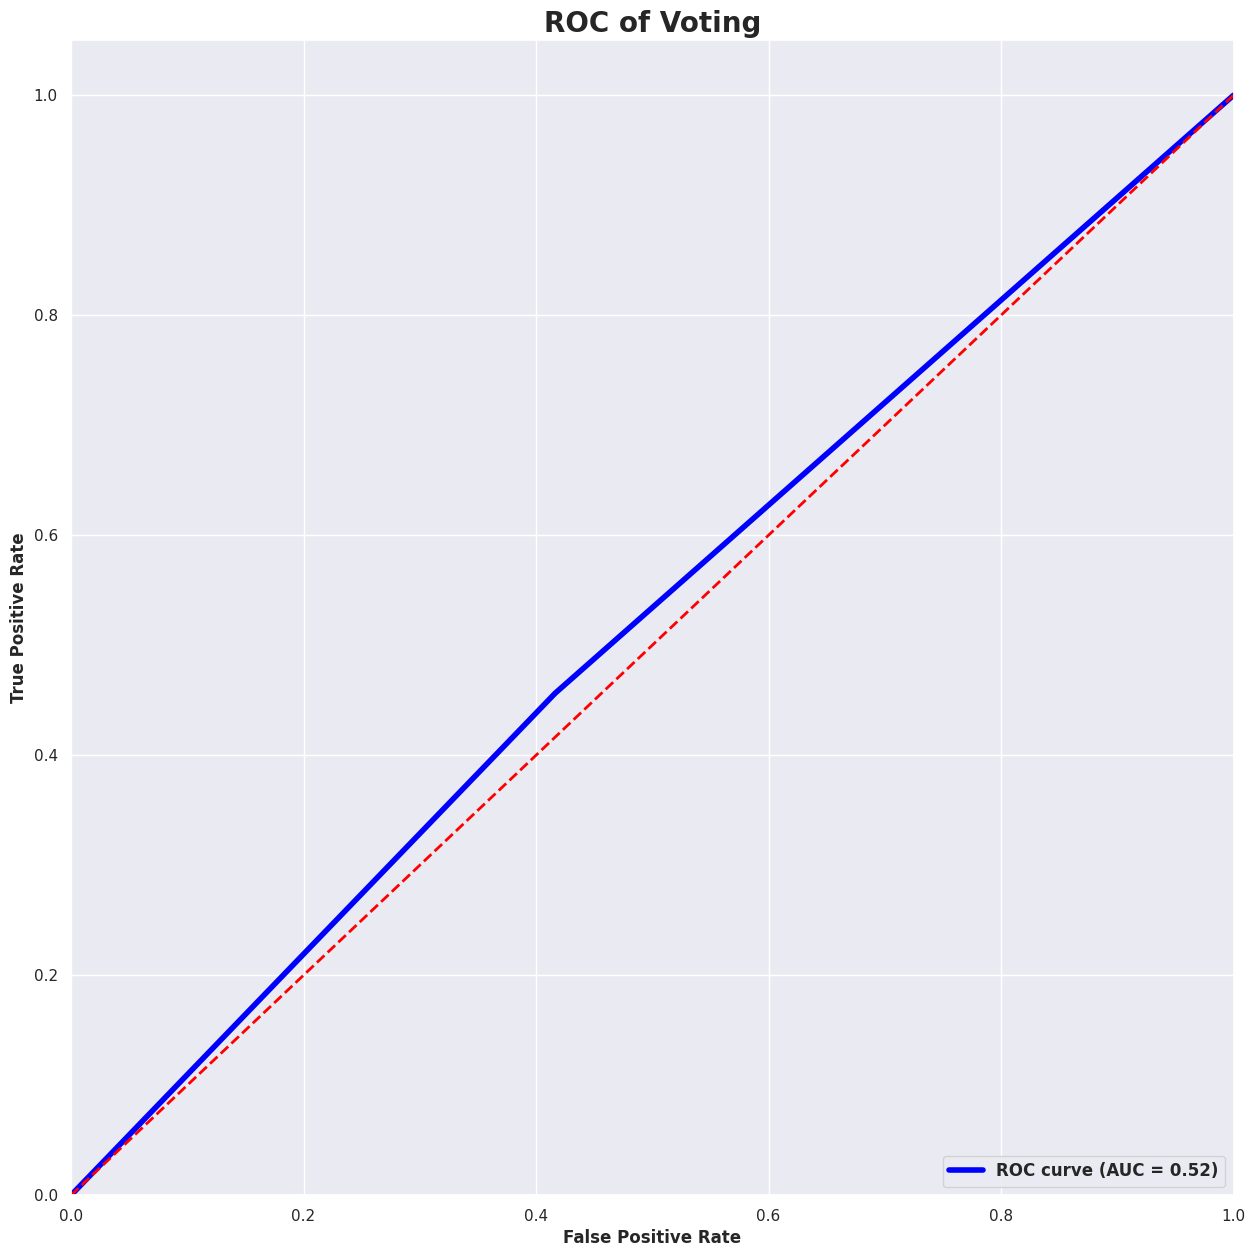

In [12]:
%run /kaggle/working/ads_fraud_detection/src/prj2/5.deep_learning_model/1.base/Resnet50/resnet50__classweight_kaggle.ipynb